In [1]:
# tf2 environment
import os
import glob
#import zipfile
import numpy as np

import matplotlib.pyplot as plt


In [31]:
def read_tsv_and_create_dict(file_path):
    participant_mapping = {}
    
    with open(file_path, 'r') as file:
        header = file.readline()  # Skip the header line
        for line in file:
            participant_id, sub_id_bids, scan_id, session, age, sex, group = line.strip().split('\t')
            
            # Convert age to float
            age = float(age)
            
            # Check if the participant_id is already in the mapping, if not, assign it a unique identifier
            if participant_id not in participant_mapping:
                unique_id = len(participant_mapping)
                participant_mapping[participant_id] = {'id': unique_id, 'scan_ids': {}, 'age': {}}  # Initialize nested dictionaries
            
            # Append the scan_id and age to the participant's dictionary
            participant_mapping[participant_id]['scan_ids'][scan_id] = age
            participant_mapping[participant_id]['age'][scan_id] = age
    
    return participant_mapping

In [52]:
import pandas as pd
def read_tsv_and_create_dataframe(file_path):
    participant_data = []
    
    with open(file_path, 'r') as file:
        header = file.readline()  # Skip the header line
        for line in file:
            participant_id, sub_id_bids, scan_id, session, age, sex, group = line.strip().split('\t')
            
            # Convert age to float
            age = float(age)
            
            # Append data to participant_data list
            participant_data.append([participant_id, scan_id, age, sex])
            
    # Create a DataFrame with the participant data
    columns = ['participant_id', 'scan_id', 'age', 'sex']
    df = pd.DataFrame(participant_data, columns=columns)
    
    return df

In [ ]:
# Specify the path to your TSV file
file_path = '/home/andjela/Documents/intra-inter-ddfs/src/participants.tsv'

# Call the function to create the dictionary for all 64 patients
participant_mapping = read_tsv_and_create_dict(file_path)

# Obtain dictionnary with subject, scan_id, age and sex
full_df = read_tsv_and_create_dataframe(file_path)


In [33]:
def find_scan_ids(name):
    #Outputs patient number, moving and fixed image scanID as strings for further analysis
    #Possible folder name pairs are below with each string differing in length
    # name = 'CL_Dev_004_CL_Dev_008'
    # name1 = 'CL_Dev_004_PS15_048'
    # name2 = 'PS15_048_CL_Dev_004'
    # name3 = 'PS15_048_PS17_017'
    # name4 = 'PS16_058_PS1183-10-1'

    #idx contains a list of strings of a given name
    idx = [s for s in name.split("_")]
    

    if len(idx) == 6:
        
        mov = f'{idx[0]}_{idx[1]}_{idx[2]}'
        fix = f'{idx[3]}_{idx[4]}_{idx[5]}'
        return(mov, fix)

    elif len(idx) == 5:
        if 'CL' in idx[0]:
            mov = f'{idx[0]}_{idx[1]}_{idx[2]}'
            fix = f'{idx[3]}_{idx[4]}'
            
            return(mov, fix)
        elif 'PS' in idx[0]:
            mov = f'{idx[0]}_{idx[1]}'
            fix = f'{idx[2]}_{idx[3]}_{idx[4]}'
            
            return(mov, fix)

    elif len(idx) == 4:
        mov = f'{idx[0]}_{idx[1]}'
        fix = f'{idx[2]}_{idx[3]}'
        return(mov, fix)

    elif len(idx) == 3 and '-' not in idx[2]:
        mov = f'{idx[0]}'
        fix = f'{idx[1]}_{idx[2]}'
        return(mov, fix)

    elif len(idx) == 3 and '-' in idx[2]:
        mov = f'{idx[0]}_{idx[1]}'
        fix = f'{idx[2]}'
        return(mov, fix)

    else:
        print('Not a corresponding folder name', name)

## Dataframes for both training schemes

In [76]:
def calculate_average_abs_log_jacobian(volume):
    # Iterate through the image_3d and store the absolute values of all elements in abs_values
    abs_values = np.abs(volume)

    # Calculate the average of the absolute values
    average_absolute = np.mean(abs_values)

    return average_absolute

In [77]:
def calculate_average_log_jacobian(volume):
    # Iterate through the image_3d and store the absolute values of all elements in abs_values

    # Calculate the average of the absolute values
    average_absolute = np.mean(volume)

    return average_absolute

# PLOTS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
file_path = 'C:\\Users\\andje\\Downloads\\pairs_ias_r.csv'
pairs_ias_r = pd.read_csv(file_path)

file_path = 'C:\\Users\\andje\\Downloads\\pairs_ia_r.csv'
pairs_ia_r = pd.read_csv(file_path)

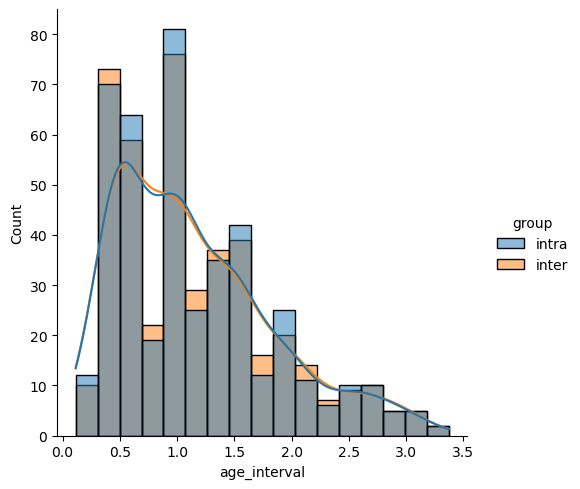

In [13]:
sns.displot(pairs_ia_r, x="age_interval", hue="group", kde=True)

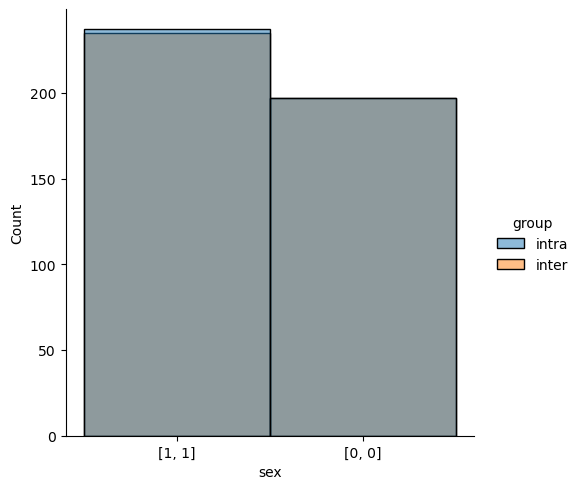

In [40]:
# sns.displot(pairs_ias_r, x="init_age", hue="group", kind="kde", fill=True)
sns.displot(pairs_ias_r, x="sex", hue="group", bins=25)

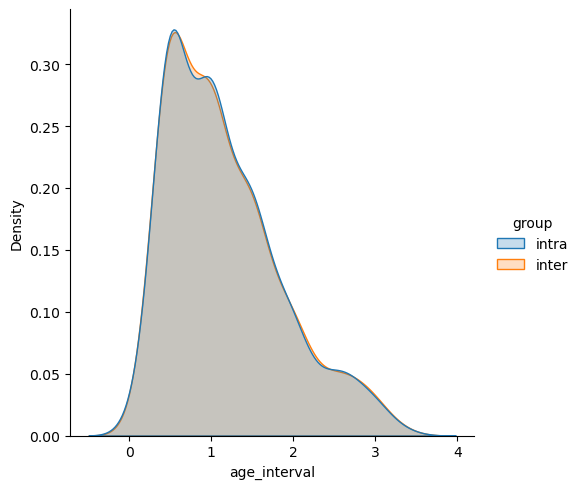

In [54]:
sns.displot(pairs_ia_r, x="age_interval", hue="group", kind="kde", fill=True)

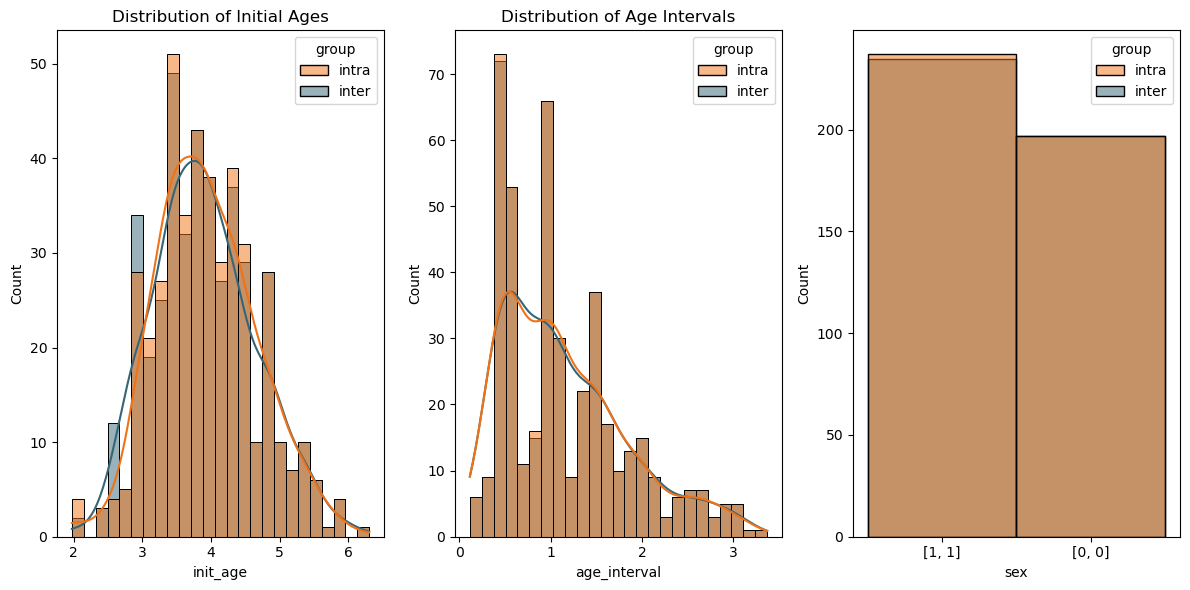

In [46]:
# Define the color palette for groups
# palette = {"intra": (1.0, 0.4980392156862745, 0.054901960784313725), "inter": (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)}
palette = {"intra": (0.944, 0.448, 0.088), "inter": (0.212, 0.4, 0.464)}

# Create a matplotlib figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Plot the first displot on the first subplot
sns.histplot(data=pairs_ias_r, x="init_age", hue="group", kde=True, bins=25, palette=palette, ax=axes[0])

# Set title for the first subplot
axes[0].set_title('Distribution of Initial Ages')

# Plot the second displot on the second subplot
sns.histplot(data=pairs_ias_r, x="age_interval", hue="group", kde=True, bins=25, palette=palette, ax=axes[1])

sns.histplot(data=pairs_ias_r, x="sex", hue="group", bins=25, palette=palette, ax=axes[2])
# Set title for the second subplot
axes[1].set_title('Distribution of Age Intervals')
# Get the default Seaborn color palette
default_palette = sns.color_palette()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\andje\AppData\Local\Temp\ipykernel_147344\3327318102.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['Male', 'Female'])


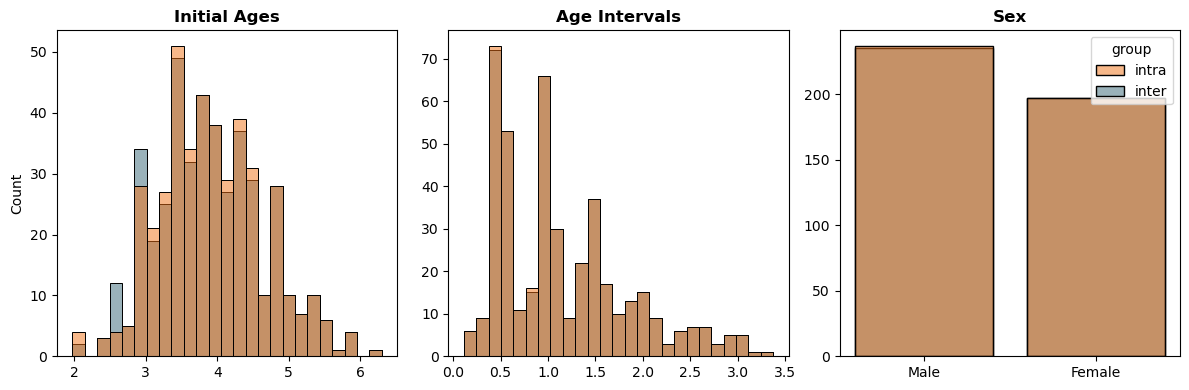

In [87]:
# Define the color palette for groups
# palette = {"intra": (1.0, 0.4980392156862745, 0.054901960784313725), "inter": (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)}
palette = {"intra": (0.944, 0.448, 0.088), "inter": (0.212, 0.4, 0.464)}

# Create a matplotlib figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the first displot on the first subplot

sns.histplot(data=pairs_ias_r, x="init_age", hue="group", bins=25,fill=True, palette=palette, ax=axes[0])
# sns.kdeplot(pairs_ias_r, x="init_age", hue="group", fill=True, palette=palette, ax=axes[0])

# Set title for the first subplot
axes[0].set_xlabel('')
axes[0].set_title('Initial Ages', fontweight='bold')
axes[0].get_legend().remove()

# Plot the second displot on the second subplot
sns.histplot(data=pairs_ias_r, x="age_interval", hue="group", bins=25,fill=True, palette=palette, ax=axes[1])
# sns.kdeplot(pairs_ias_r, x="age_interval", hue="group", fill=True, palette=palette, ax=axes[1])

sns.histplot(pairs_ias_r, x="sex", hue="group", fill=True, palette=palette, shrink=.8, ax=axes[2])
# Set title for the second subplot
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].get_legend().remove()
axes[1].set_title('Age Intervals', fontweight='bold')
axes[2].set_ylabel('')
axes[2].set_xlabel('')
axes[2].set_title('Sex', fontweight='bold')
axes[2].set_xticklabels(['Male', 'Female'])
# Get the default Seaborn color palette
default_palette = sns.color_palette()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

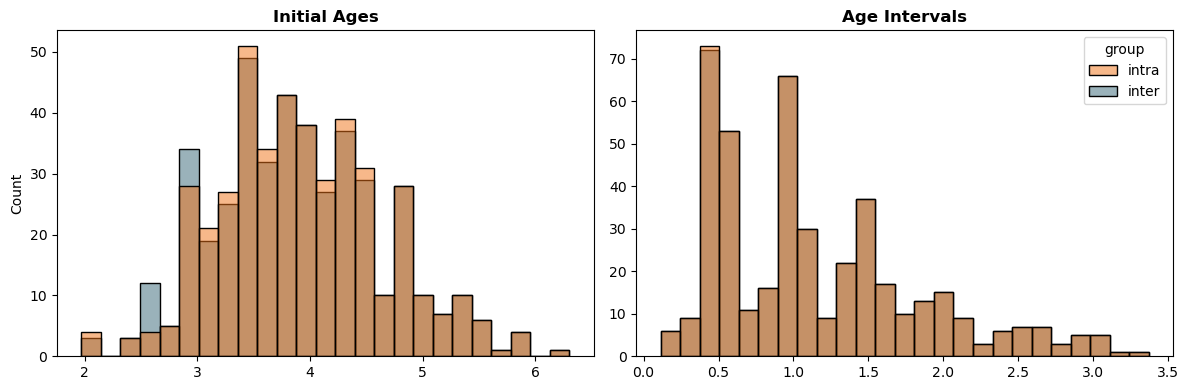

In [90]:
# Define the color palette for groups
# palette = {"intra": (1.0, 0.4980392156862745, 0.054901960784313725), "inter": (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)}
palette = {"intra": (0.944, 0.448, 0.088), "inter": (0.212, 0.4, 0.464)}

# Create a matplotlib figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first displot on the first subplot

sns.histplot(data=pairs_ia_r, x="init_age", hue="group", bins=25,fill=True, palette=palette, ax=axes[0])
# sns.kdeplot(pairs_ias_r, x="init_age", hue="group", fill=True, palette=palette, ax=axes[0])

# Set title for the first subplot
axes[0].set_xlabel('')
axes[0].set_title('Initial Ages', fontweight='bold')
axes[0].get_legend().remove()

# Plot the second displot on the second subplot
sns.histplot(data=pairs_ia_r, x="age_interval", hue="group", bins=25,fill=True, palette=palette, ax=axes[1])
# sns.kdeplot(pairs_ias_r, x="age_interval", hue="group", fill=True, palette=palette, ax=axes[1])

# Set title for the second subplot
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('Age Intervals', fontweight='bold')

# Get the default Seaborn color palette
default_palette = sns.color_palette()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
file_path = 'C:\\Users\\andje\\Downloads\\logJac_ia_r_NO.csv'
logJac_ia_r_NO = pd.read_csv(file_path)

file_path = 'C:\\Users\\andje\\Downloads\\logJac_ia_r_O.csv'
logJac_ia_r_O = pd.read_csv(file_path)

In [8]:
file_path = 'C:\\Users\\andje\\Downloads\\logJac_ias_r_NO.csv'
logJac_ias_r_NO = pd.read_csv(file_path)

file_path = 'C:\\Users\\andje\\Downloads\\logJac_ias_r_O.csv'
logJac_ias_r_O = pd.read_csv(file_path)

In [5]:
pairs_ia_r

,Unnamed: 0,scan_id_1,scan_id_2,init_age,age_interval,sex,group
0,0,PS14_001,PS14_053,4.1389,0.5250,"[1, 1]",intra
1,1,PS14_001,PS14_120,4.1389,1.0000,"[1, 1]",intra
2,2,PS14_001,PS15_061,4.1389,1.4167,"[1, 1]",intra
3,3,PS14_001,PS15_138,4.1389,1.8778,"[1, 1]",intra
4,4,PS14_053,PS14_120,4.6639,0.4750,"[1, 1]",intra
...,...,...,...,...,...,...,...
862,428,PS17_033,PS15_106,3.9306,0.7194,"[0, 0]",inter
863,429,PS17_047,PS0969-10-1,4.9167,1.4527,"[1, 1]",inter
864,430,PS17_050,PS0548-10-1,5.8889,0.9611,"[1, 0]",inter
865,431,PS17_039,PS1119-10-1,4.7778,0.9805,"[0, 0]",inter


In [70]:
logJac_ia_r_NO

,scan_id_1,scan_id_2,age_interval,avg_abs_log_jacobian,group
0,PS15_032,PS17_013,2.0973,0.030817,intra
1,PS14_060,PS17_015,2.8750,0.035202,intra
2,PS15_116,PS16_028,0.5945,0.017690,intra
3,PS14_073,PS17_013,2.5806,0.031895,intra
4,PS14_060,PS14_123,0.3666,0.017652,intra
...,...,...,...,...,...
593,PS14_110,PS15_057,0.4055,0.027872,intra
594,PS15_110,PS16_032,0.5806,0.022541,intra
595,PS15_015,PS17_010,1.5667,0.024078,inter
596,PS15_015,PS17_031,2.4723,0.024886,intra


In [68]:
# print(logJac_ias_r_NO['avg_abs_log_jacobian'].mean(), logJac_ias_r_NO['avg_abs_log_jacobian'].std())
print(logJac_ias_r_NO[logJac_ias_r_NO['group'] == 'intra']['avg_abs_log_jacobian'].mean(), logJac_ias_r_NO[logJac_ias_r_NO['group'] == 'intra']['avg_abs_log_jacobian'].std())
print(logJac_ias_r_O[logJac_ias_r_O['group'] == 'intra']['avg_abs_log_jacobian'].mean(), logJac_ias_r_O[logJac_ias_r_O['group'] == 'intra']['avg_abs_log_jacobian'].std())
print(logJac_ia_r_NO[logJac_ia_r_NO['group'] == 'intra']['avg_abs_log_jacobian'].mean(), logJac_ia_r_NO[logJac_ia_r_NO['group'] == 'intra']['avg_abs_log_jacobian'].std())
print(logJac_ia_r_O[logJac_ia_r_O['group'] == 'intra']['avg_abs_log_jacobian'].mean(), logJac_ia_r_O[logJac_ia_r_O['group'] == 'intra']['avg_abs_log_jacobian'].std())

0.029097921961996034 0.005722820802877109
0.029013236323336862 0.005776259045996958
0.029223475872522404 0.00590400072755072
0.029089407419106785 0.005812294803040347


In [69]:
print(logJac_ias_r_NO[logJac_ias_r_NO['group'] == 'inter']['avg_abs_log_jacobian'].mean(), logJac_ias_r_NO[logJac_ias_r_NO['group'] == 'inter']['avg_abs_log_jacobian'].std())
print(logJac_ias_r_O[logJac_ias_r_O['group'] == 'inter']['avg_abs_log_jacobian'].mean(), logJac_ias_r_O[logJac_ias_r_O['group'] == 'inter']['avg_abs_log_jacobian'].std())
print(logJac_ia_r_NO[logJac_ia_r_NO['group'] == 'inter']['avg_abs_log_jacobian'].mean(), logJac_ia_r_NO[logJac_ia_r_NO['group'] == 'inter']['avg_abs_log_jacobian'].std())
print(logJac_ia_r_O[logJac_ia_r_O['group'] == 'inter']['avg_abs_log_jacobian'].mean(), logJac_ia_r_O[logJac_ia_r_O['group'] == 'inter']['avg_abs_log_jacobian'].std())

0.02455044742301102 0.0023533846089649753
0.024423381878014565 0.002280688274763343
0.024366423767059994 0.0016968691056933802
0.024344582135561666 0.001709167320204412


In [34]:
file_path = 'C:\\Users\\andje\\Documents\\Biomed\\Doctorat\\Projets\\intra-inter-classification\\src\\all-participants.tsv'

# Call the function to create the dictionary for all 96 patients
participant_mapping = read_tsv_and_create_dict(file_path)

In [46]:
participant_mapping

{'10006': {'id': 0,
  'scan_ids': {'PS14_001': 4.1389,
   'PS14_053': 4.6639,
   'PS14_120': 5.1389,
   'PS15_061': 5.5556,
   'PS15_138': 6.0167},
  'age': {'PS14_001': 4.1389,
   'PS14_053': 4.6639,
   'PS14_120': 5.1389,
   'PS15_061': 5.5556,
   'PS15_138': 6.0167}},
 '10007': {'id': 1,
  'scan_ids': {'PS14_121': 3.4722, 'PS15_062': 3.8889, 'PS15_139': 4.35},
  'age': {'PS14_121': 3.4722, 'PS15_062': 3.8889, 'PS15_139': 4.35}},
 '10008': {'id': 2,
  'scan_ids': {'PS14_046': 3.7306,
   'PS14_079': 4.2028,
   'PS16_001': 5.2944,
   'PS16_045': 5.8139,
   'PS17_018': 6.8111},
  'age': {'PS14_046': 3.7306,
   'PS14_079': 4.2028,
   'PS16_001': 5.2944,
   'PS16_045': 5.8139,
   'PS17_018': 6.8111}},
 '10009': {'id': 3,
  'scan_ids': {'PS14_070': 3.4333,
   'PS15_002': 3.9528,
   'PS15_092': 4.4917,
   'PS16_020': 4.9722,
   'PS16_072': 5.4472,
   'PS17_029': 6.4611},
  'age': {'PS14_070': 3.4333,
   'PS15_002': 3.9528,
   'PS15_092': 4.4917,
   'PS16_020': 4.9722,
   'PS16_072': 5.4472,

In [35]:
def find_participant_id(dict, scan_id):
    participant_id = None
    for pid, pdata in dict.items():
        if scan_id in pdata['scan_ids']:
            participant_id = pid
            break
    return participant_id

In [36]:
# Filter data for specific points
intra_data = logJac_ia_r_NO[logJac_ia_r_NO['group'] == 'intra'] 
for index, row in intra_data.iterrows():
    scan_id_1 = row['scan_id_1']
    scan_id_2 = row['scan_id_2']
    participant_id = find_participant_id(participant_mapping, scan_id_1)
    intra_data.at[index, 'participant_id'] = participant_id
    age_1 = participant_mapping[participant_id]['scan_ids'][scan_id_1]
    age_2 = participant_mapping[participant_id]['scan_ids'][scan_id_2]
    intra_data.at[index, 'init_age'] = min(age_1, age_2)

print(intra_data.head())



  scan_id_1 scan_id_2  age_interval  avg_abs_log_jacobian  group  \
0  PS15_032  PS17_013        2.0973              0.030817  intra   
1  PS14_060  PS17_015        2.8750              0.035202  intra   
2  PS15_116  PS16_028        0.5945              0.017690  intra   
3  PS14_073  PS17_013        2.5806              0.031895  intra   
4  PS14_060  PS14_123        0.3666              0.017652  intra   

  participant_id  init_age  
0          10020    4.2694  
1          10061    3.4778  
2          10020    4.7472  
3          10020    3.7861  
4          10061    3.4778  


C:\Users\andje\AppData\Local\Temp\ipykernel_11772\1412232262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intra_data.at[index, 'participant_id'] = participant_id
C:\Users\andje\AppData\Local\Temp\ipykernel_11772\1412232262.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intra_data.at[index, 'init_age'] = min(age_1, age_2)


NUMBER OF GROUPS: 50


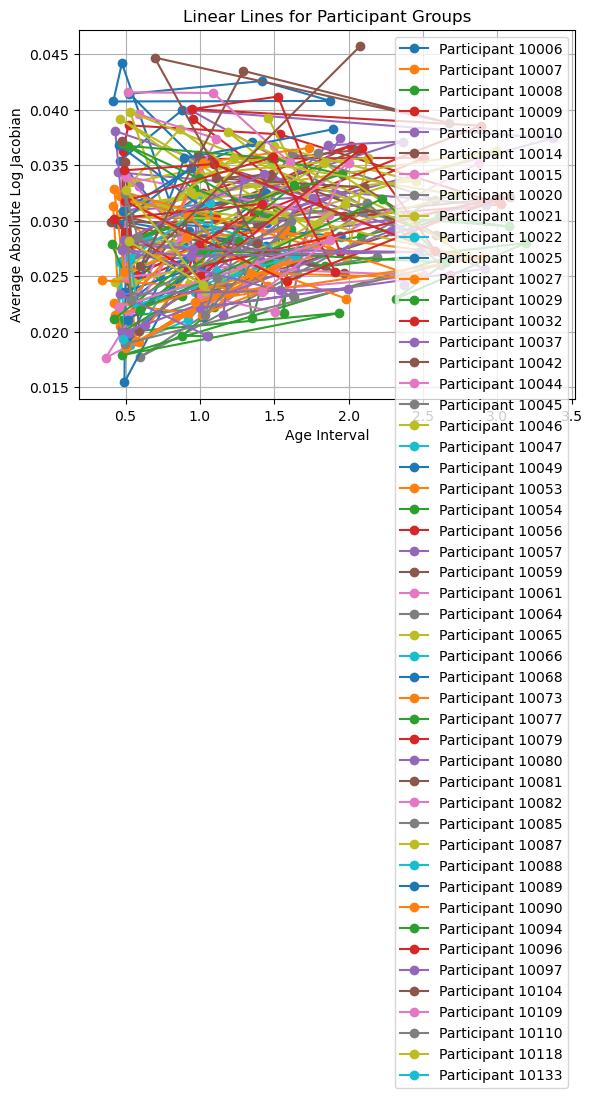

In [38]:
grouped_data = intra_data.groupby('participant_id')
i= 0
for name, group in grouped_data:
    # print(f"Group: {name}")
    # print(group.info())
    # print("\n")
    i+=1
print('NUMBER OF GROUPS:', i)

# Define the number of distinct colors needed
num_colors = 50

# Generate a color palette with the specified number of distinct colors
color_palette = sns.color_palette("hsv", num_colors)

# Plot linear lines for each group
for participant_id, group_data in grouped_data:
    plt.plot(group_data['age_interval'], group_data['avg_abs_log_jacobian'], marker='o', label=f'Participant {participant_id}')

# Set labels and title
plt.xlabel('Age Interval')
plt.ylabel('Average Absolute Log Jacobian')
plt.title('Linear Lines for Participant Groups')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
# Group the DataFrame by participant_id
grouped_data = intra_data.groupby('participant_id')
i= 0
for name, group in grouped_data:
    # print(f"Group: {name}")
    # print(group.info())
    # print("\n")
    i+=1
print('NUMBER OF GROUPS:', i)

from scipy.interpolate import CubicSpline

# Define the number of distinct colors needed
num_colors = 50

# Generate a custom color palette with varying saturation levels
custom_palette = [(hue, 0.7, 1.0) for hue in sns.color_palette("hsv", num_colors)]
x = 'init_age'
# Plot linear lines for each group
for participant_id, group_data in grouped_data:
    print(len(group_data[f'{x}']))
    if len(group_data[f'{x}']) == 1:

        print('Only 2 subjects')
    else:
        print(type(group_data[f'{x}']))
        # plt.plot(group_data['age_interval'], group_data['avg_abs_log_jacobian'], marker='o', label=f'Participant {participant_id}')
        
        spline_func = CubicSpline(group_data[f'{x}'].sort_values(), group_data['avg_abs_log_jacobian'])
    
        # Generate a denser time grid for smooth plotting
        dense_time = np.linspace(group_data[f'{x}'].min(), group_data[f'{x}'].max(), 100)
        
        # Plot the smooth trajectory
        plt.plot(dense_time, spline_func(dense_time), label=f'Participant {participant_id}')

# Set labels and title
plt.xlabel('Age Interval')
plt.ylabel('Average Absolute Log Jacobian')
plt.title('Linear Lines for Participant Groups')
plt.legend()
plt.grid(True)
plt.show()

NUMBER OF GROUPS: 50
10
<class 'pandas.core.series.Series'>


ValueError: `x` must be strictly increasing sequence.

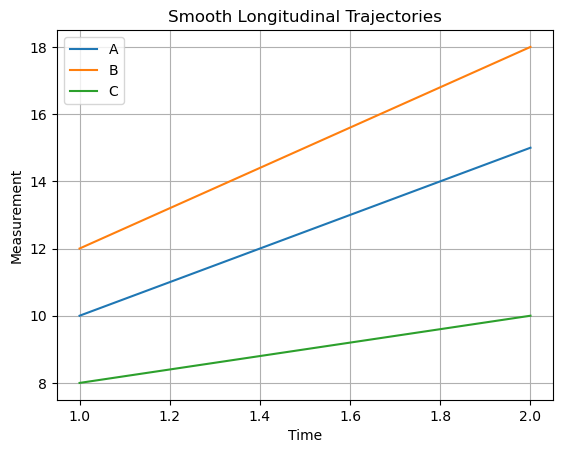

In [36]:
from scipy.interpolate import CubicSpline

# Example data (replace with your own data)
data = pd.DataFrame({
    'Subject': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Time': [1, 2, 1, 2, 1, 2],
    'Measurement': [10, 15, 12, 18, 8, 10]
})

# Plot smooth trajectories for individual subjects
for subject, group_data in data.groupby('Subject'):
    # Perform cubic spline interpolation
    spline_func = CubicSpline(group_data['Time'], group_data['Measurement'])
    
    # Generate a denser time grid for smooth plotting
    dense_time = np.linspace(group_data['Time'].min(), group_data['Time'].max(), 100)
    
    # Plot the smooth trajectory
    plt.plot(dense_time, spline_func(dense_time), label=subject)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Measurement')
plt.title('Smooth Longitudinal Trajectories')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_joint_plot(data, y, y_axis_title, x, x_axis_title, title):
    # Create a joint plot
    joint = sns.jointplot(
        x=x,
        y=y,
        data=data,
        hue='group',
        # kind='kde',
        palette={"intra": "#EC7016", "inter": "#35646E"},
        # height=8
        # common_norm=False
    )
    # Set new labels for x and y axes
    # joint.set_axis_labels('Age Interval', joint.set_axis_labels('Age Interval', 'Average Absolute Log Jacobian Value'))
    joint.set_axis_labels(x_axis_title, y_axis_title, fontweight='bold')
    joint.ax_joint.grid(True)
    joint.ax_joint.set_axisbelow(True)

    # Add minor ticks to both x and y axes
    joint.ax_joint.minorticks_on()

    # joint.ax_joint.set_xlabel(fontweight='bold')
    # joint.ax_joint.set_ylabel(fontweight='bold')

    # Set the legend name to 'Pair Type'
    joint.ax_joint.legend(title='Pair Type')
    # plt.suptitle(title)

    return joint





In [187]:
create_joint_plot(df_279_no_overlap, 'avg_log_jacobian', 'Average Log Jacobian Value')

TypeError: create_joint_plot() missing 1 required positional argument: 'title'

In [9]:
merged_df_ia_r_NO = pd.merge(logJac_ia_r_NO, pairs_ia_r[['scan_id_1', 'scan_id_2', 'init_age']], on=['scan_id_1', 'scan_id_2'], how='left')
merged_df_ia_r_O = pd.merge(logJac_ia_r_O, pairs_ia_r[['scan_id_1', 'scan_id_2', 'init_age']], on=['scan_id_1', 'scan_id_2'], how='left')
merged_df_ias_r_NO = pd.merge(logJac_ias_r_NO, pairs_ias_r[['scan_id_1', 'scan_id_2', 'init_age']], on=['scan_id_1', 'scan_id_2'], how='left')
merged_df_ias_r_O = pd.merge(logJac_ias_r_O, pairs_ias_r[['scan_id_1', 'scan_id_2', 'init_age']], on=['scan_id_1', 'scan_id_2'], how='left')


In [28]:
print(merged_df_ias_r_NO[merged_df_ias_r_NO['group'] == 'inter']['init_age'].mean(), merged_df_ias_r_NO[merged_df_ias_r_NO['group'] == 'inter']['init_age'].std())
print(merged_df_ias_r_O[merged_df_ias_r_O['group'] == 'inter']['init_age'].mean(), merged_df_ias_r_O[merged_df_ias_r_O['group'] == 'inter']['init_age'].std())
print(merged_df_ia_r_NO[merged_df_ia_r_NO['group'] == 'inter']['init_age'].mean(), merged_df_ia_r_NO[merged_df_ia_r_NO['group'] == 'inter']['init_age'].std())
print(merged_df_ia_r_O[merged_df_ia_r_O['group'] == 'inter']['init_age'].mean(), merged_df_ia_r_O[merged_df_ia_r_O['group'] == 'inter']['init_age'].std())

4.0202623529411765 0.8979991893326055
3.8005314285714284 0.794318464315634
3.8930778947368423 0.893746465093911
3.931120149253731 0.7938789900192359


In [29]:
print(merged_df_ias_r_NO[merged_df_ias_r_NO['group'] == 'intra']['init_age'].mean(), merged_df_ias_r_NO[merged_df_ias_r_NO['group'] == 'intra']['init_age'].std())
print(merged_df_ias_r_O[merged_df_ias_r_O['group'] == 'intra']['init_age'].mean(), merged_df_ias_r_O[merged_df_ias_r_O['group'] == 'intra']['init_age'].std())
print(merged_df_ia_r_NO[merged_df_ia_r_NO['group'] == 'intra']['init_age'].mean(), merged_df_ia_r_NO[merged_df_ia_r_NO['group'] == 'intra']['init_age'].std())
print(merged_df_ia_r_O[merged_df_ia_r_O['group'] == 'intra']['init_age'].mean(), merged_df_ia_r_O[merged_df_ia_r_O['group'] == 'intra']['init_age'].std())

4.0357746527777785 0.6549657244668301
3.97247027027027 0.7479018532516237
4.020276035502958 0.6604943708125277
3.936247916666667 0.7392883002837334


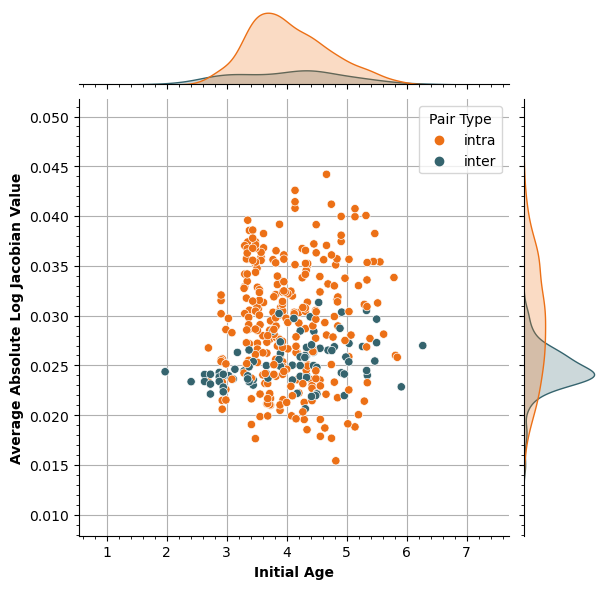

In [39]:
create_joint_plot(merged_df_ias_r_NO, 'avg_abs_log_jacobian', 'Average Absolute Log Jacobian Value', 'init_age', 'Initial Age', 'NO')

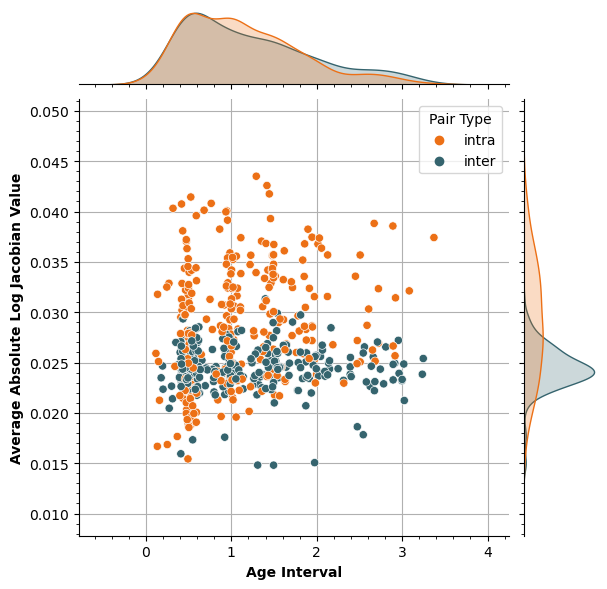

In [42]:

n_o = create_joint_plot(logJac_ias_r_O, 'avg_abs_log_jacobian', 'Average Absolute Log Jacobian Value', 'age_interval', 'Age Interval', 'No Overlap')

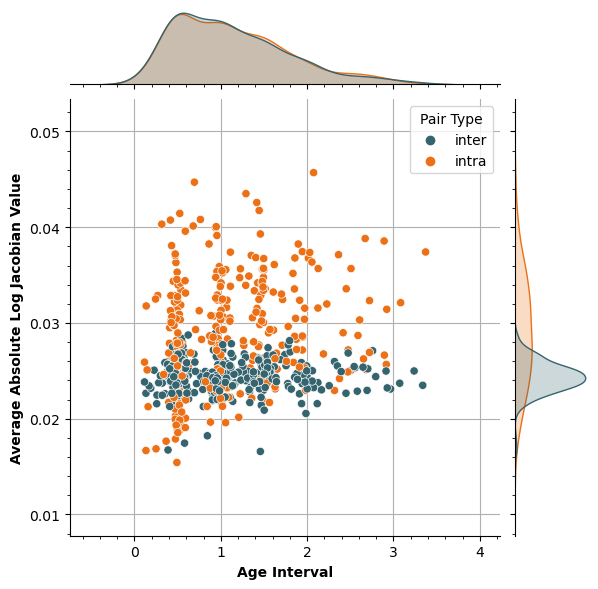

In [6]:
o = create_joint_plot(logJac_ia_r_O, 'avg_abs_log_jacobian', 'Average Absolute Log Jacobian Value', 'Overlap')

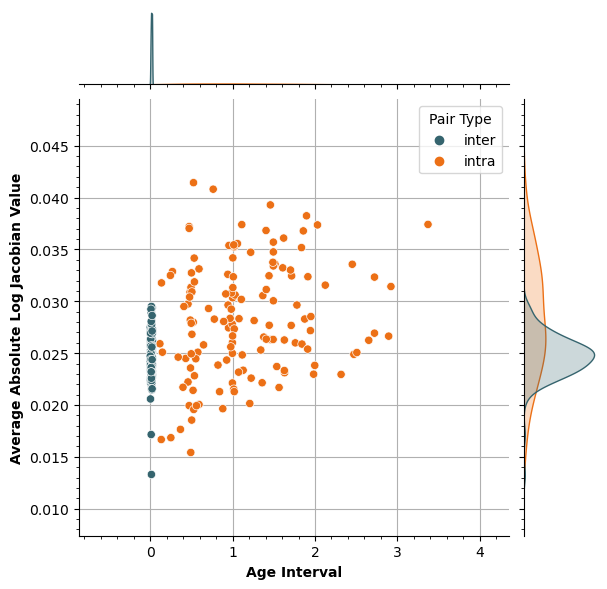

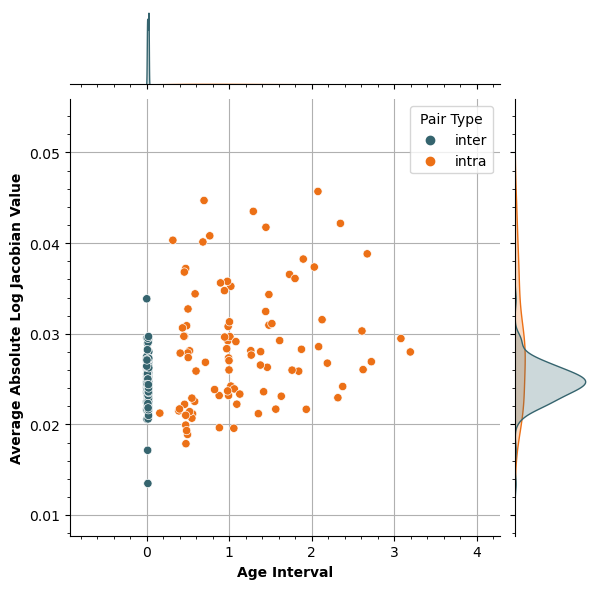

In [191]:

# Assuming you have a figure with two subplots arranged in one row and two columns
# fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First subplot
# plt.sca(axs[0])  # Set the current axis to the first subplot
o = create_joint_plot(df_279_overlap, 'avg_abs_log_jacobian', 'Average Absolute Log Jacobian Value', 'Overlap')
# plt.title('Overlap')

# Second subplot
# plt.sca(axs[1])  # Set the current axis to the second subplot
n_o = create_joint_plot(df_279_no_overlap, 'avg_abs_log_jacobian', 'Average Absolute Log Jacobian Value', 'No Overlap')
# plt.title('No Overlap')

# plt.tight_layout()  # Adjust layout
# plt.show()

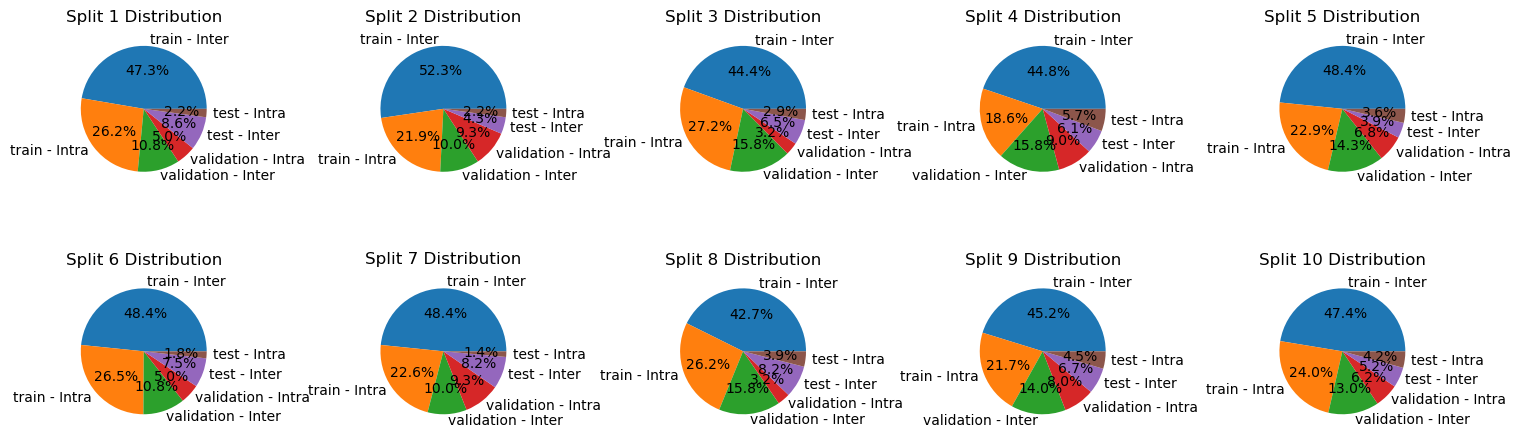

In [63]:
import matplotlib.pyplot as plt

# Example counts for 'intra' and 'inter' for each split
splits_counts_no_overlap = [
    {'train': {'inter': 132, 'intra': 73}, 'validation': {'inter': 30, 'intra': 14}, 'test': {'inter': 24, 'intra': 6}},
    {'train': {'inter': 146, 'intra': 61}, 'validation': {'inter': 28, 'intra': 26}, 'test': {'inter': 12, 'intra': 6}},
    {'train': {'inter': 124, 'intra': 76}, 'validation': {'inter': 44, 'intra': 9}, 'test': {'inter': 18, 'intra': 8}},
    {'train': {'inter': 125, 'intra': 52}, 'validation': {'inter': 44, 'intra': 25}, 'test': {'inter': 17, 'intra': 16}},
    {'train': {'inter': 135, 'intra': 64}, 'validation': {'inter': 40, 'intra': 19}, 'test': {'inter': 11, 'intra': 10}},
    {'train': {'inter': 135, 'intra': 74}, 'validation': {'inter': 30, 'intra': 14}, 'test': {'inter': 21, 'intra': 5}},
    {'train': {'inter': 135, 'intra': 63}, 'validation': {'inter': 28, 'intra': 26}, 'test': {'inter': 23, 'intra': 4}},
    {'train': {'inter': 119, 'intra': 73}, 'validation': {'inter': 44, 'intra': 9}, 'test': {'inter': 23, 'intra': 11}},
    {'train': {'inter': 142, 'intra': 68}, 'validation': {'inter': 44, 'intra': 25}, 'test': {'inter': 21, 'intra': 14}},
    {'train': {'inter': 146, 'intra': 74}, 'validation': {'inter': 40, 'intra': 19}, 'test': {'inter': 16, 'intra': 13}}
]

# Initialize a list to store pie chart data for each split
pie_data = []

# Create pie chart data for each split
for split_count in splits_counts:
    data = []
    labels = []
    for dataset, counts in split_count.items():
        data.extend([counts['inter'], counts['intra']])
        labels.extend([f'{dataset} - Inter', f'{dataset} - Intra'])
    pie_data.append((data, labels))

fig, axs = plt.subplots(2, 5, figsize=(15, 5))

for idx, (data, labels) in enumerate(pie_data):
    ax = axs.flatten()[idx]
    ax.pie(data, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Split {idx+1} Distribution')

plt.tight_layout()
plt.show()


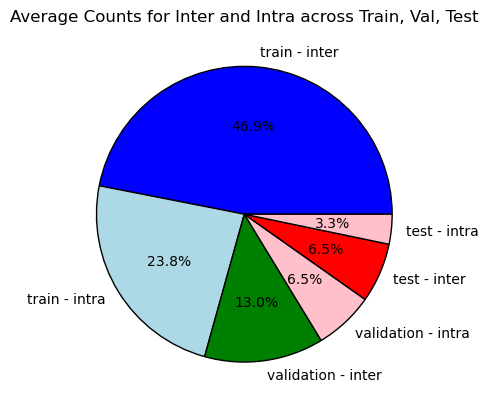

In [65]:
from collections import Counter
# Calculate total counts for each set over all 10 splits
totals = {'train': Counter(), 'validation': Counter(), 'test': Counter()}
num_splits = len(splits_counts)
for split_count in splits_counts:
    for dataset, counts in split_count.items():
        for key in counts:
            totals[dataset][key] += counts[key]

# Plotting the total counts in a pie chart
fig, ax = plt.subplots()
labels = []
sizes = []
colors = []
# Calculate average counts for each set
average_counts = {dataset: {key: count / num_splits for key, count in counts.items()} for dataset, counts in totals.items()}

for dataset, counts in average_counts.items():
    for key, value in counts.items():
        labels.append(f'{dataset} - {key}')
        sizes.append(value)
        if key == 'intra':
            if dataset == 'train':
                colors.append('lightblue')
            elif dataset == 'val':
                colors.append('lightgreen')
            else:
                colors.append('#FFC0CB')  # Custom color for other 'intra' segments
        else:
            if dataset == 'train':
                colors.append('blue')
            elif dataset == 'validation':
                colors.append('green')
            else:
                colors.append('red') 
              # Default color for 'inter'

# Create the pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Loop through wedges and set their edge color
for wedge in wedges:
    wedge.set_edgecolor('black')

ax.set_title('Average Counts for Inter and Intra across Train, Val, Test')
plt.show()

In [166]:
# Example counts for 'intra' and 'inter' for each split
splits_counts_no_overlap = [
    {'Train': {'inter': 132, 'intra': 73}, 'Validation': {'inter': 30, 'intra': 14}, 'Test': {'inter': 24, 'intra': 6}},
    {'Train': {'inter': 146, 'intra': 61}, 'Validation': {'inter': 28, 'intra': 26}, 'Test': {'inter': 12, 'intra': 6}},
    {'Train': {'inter': 124, 'intra': 76}, 'Validation': {'inter': 44, 'intra': 9}, 'Test': {'inter': 18, 'intra': 8}},
    {'Train': {'inter': 125, 'intra': 52}, 'Validation': {'inter': 44, 'intra': 25}, 'Test': {'inter': 17, 'intra': 16}},
    {'Train': {'inter': 135, 'intra': 64}, 'Validation': {'inter': 40, 'intra': 19}, 'Test': {'inter': 11, 'intra': 10}},
    {'Train': {'inter': 135, 'intra': 74}, 'Validation': {'inter': 30, 'intra': 14}, 'Test': {'inter': 21, 'intra': 5}},
    {'Train': {'inter': 135, 'intra': 63}, 'Validation': {'inter': 28, 'intra': 26}, 'Test': {'inter': 23, 'intra': 4}},
    {'Train': {'inter': 119, 'intra': 73}, 'Validation': {'inter': 44, 'intra': 9}, 'Test': {'inter': 23, 'intra': 11}},
    {'Train': {'inter': 142, 'intra': 68}, 'Validation': {'inter': 44, 'intra': 25}, 'Test': {'inter': 21, 'intra': 14}},
    {'Train': {'inter': 146, 'intra': 74}, 'Validation': {'inter': 40, 'intra': 19}, 'Test': {'inter': 16, 'intra': 13}}
]

splits_counts_overlap = [
    {'Train': {'inter': 88, 'intra': 87}, 'Validation': {'inter': 40, 'intra': 36}, 'Test': {'inter': 17, 'intra': 11}},
    {'Train': {'inter': 92, 'intra': 83}, 'Validation': {'inter': 42, 'intra': 34}, 'Test': {'inter': 14, 'intra': 14}},
    {'Train': {'inter': 124, 'intra': 76}, 'Validation': {'inter': 41, 'intra': 35}, 'Test': {'inter': 14, 'intra': 14}},
    {'Train': {'inter': 125, 'intra': 52}, 'Validation': {'inter': 44, 'intra': 32}, 'Test': {'inter': 16, 'intra': 12}},
    {'Train': {'inter': 135, 'intra': 64}, 'Validation': {'inter': 42, 'intra': 34}, 'Test': {'inter': 16, 'intra': 12}},
    {'Train': {'inter': 135, 'intra': 74}, 'Validation': {'inter': 38, 'intra': 38}, 'Test': {'inter': 17, 'intra': 11}},
    {'Train': {'inter': 135, 'intra': 63}, 'Validation': {'inter': 39, 'intra': 37}, 'Test': {'inter': 17, 'intra': 11}},
    {'Train': {'inter': 119, 'intra': 73}, 'Validation': {'inter': 39, 'intra': 37}, 'Test': {'inter': 15, 'intra': 13}},
    {'Train': {'inter': 142, 'intra': 68}, 'Validation': {'inter': 38, 'intra': 38}, 'Test': {'inter': 16, 'intra': 12}},
    {'Train': {'inter': 146, 'intra': 74}, 'Validation': {'inter': 40, 'intra': 36}, 'Test': {'inter': 14, 'intra': 13}}
]

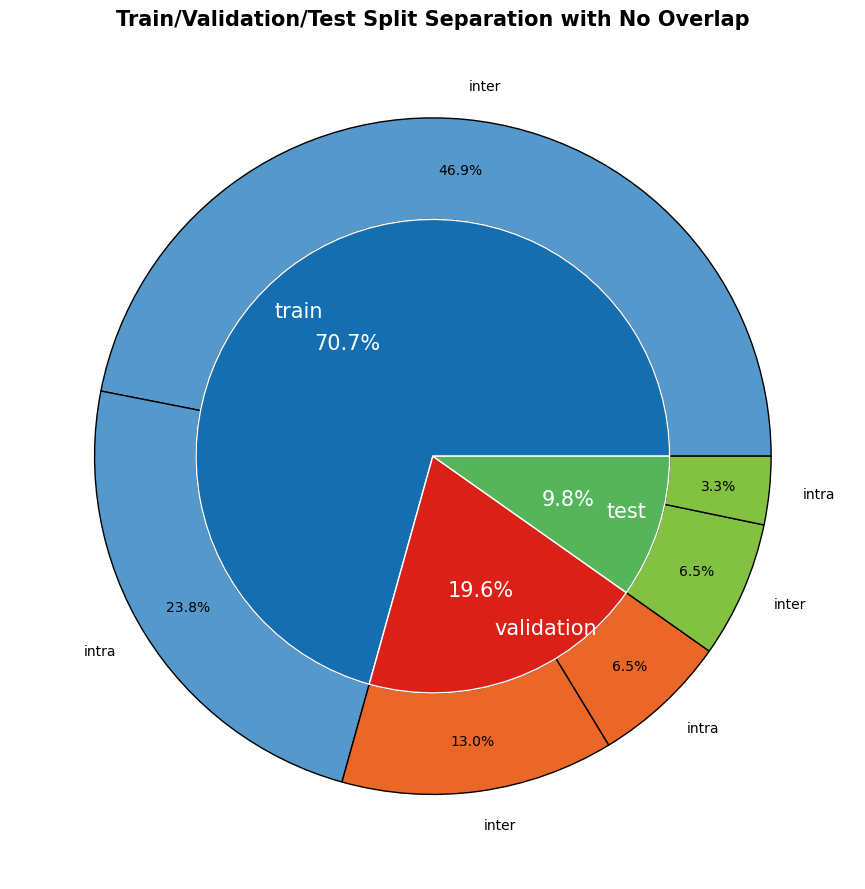

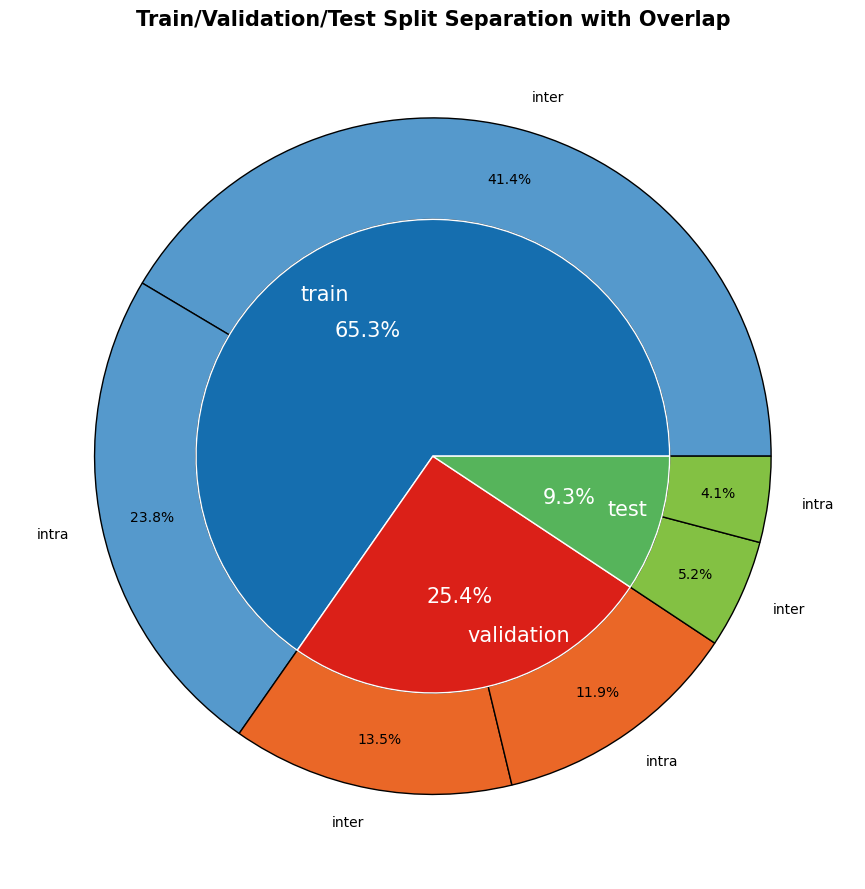

In [99]:
for splits_counts in [splits_counts_no_overlap, splits_counts_overlap]:
    # Calculate the average total counts for train, val, and test
    total_counts = {'train': 0, 'validation': 0, 'test': 0}
    for data in splits_counts:
        for key in data:
            total_counts[key] += data[key]['inter'] + data[key]['intra']
    for key in total_counts:
        total_counts[key] /= len(splits_counts)

    # Calculate the average inter and intra values per each set (train, val, test)
    avg_inter = {'train': 0, 'validation': 0, 'test': 0}
    avg_intra = {'train': 0, 'validation': 0, 'test': 0}

    for data in splits_counts:
        for category in avg_inter:
            avg_inter[category] += data[category]['inter']
            avg_intra[category] += data[category]['intra']

    for category in avg_inter:
        avg_inter[category] /= len(splits_counts)
        avg_intra[category] /= len(splits_counts)

    # Create lists of the calculated averages
    inter_values = [avg_inter[key] for key in avg_inter]
    intra_values = [avg_intra[key] for key in avg_intra]

    interleaved = [val for pair in zip(inter_values, intra_values) for val in pair]
    labels_outer = 3*['inter','intra']

    fig, ax = plt.subplots(figsize=(12, 9))

    inner_colors = ['#156EAF', '#DB2018', '#56B45B']
    outer_colors_single = ['#5599CC', '#EA6727', '#83C143']
    outer_colors = np.repeat(outer_colors_single, 2)
    size = 0.3
    r = 1

    # Generating pie charts
    ax.pie(interleaved, labels=labels_outer, radius=r,
        colors=outer_colors, wedgeprops=dict(width=size, edgecolor='k'), autopct='%1.1f%%', pctdistance=0.85)
    ax.pie([total_counts['train'], total_counts['validation'], total_counts['test']],labels=total_counts.keys() , radius=r - size, colors=inner_colors,
        labeldistance=0.77, textprops=dict(color='w', fontsize=15), wedgeprops=dict(edgecolor='w'), autopct='%1.1f%%')#, pctdistance=0.85)
    
    # Set the title for each pie chart
    # Set the title for each pie chart
    title_text = 'Train/Validation/Test Split Separation with No Overlap' if splits_counts == splits_counts_no_overlap else 'Train/Validation/Test Split Separation with Overlap'
    ax.set_title(title_text, fontsize=15, fontdict={'weight': 'bold'})

    plt.tight_layout()
    plt.show()

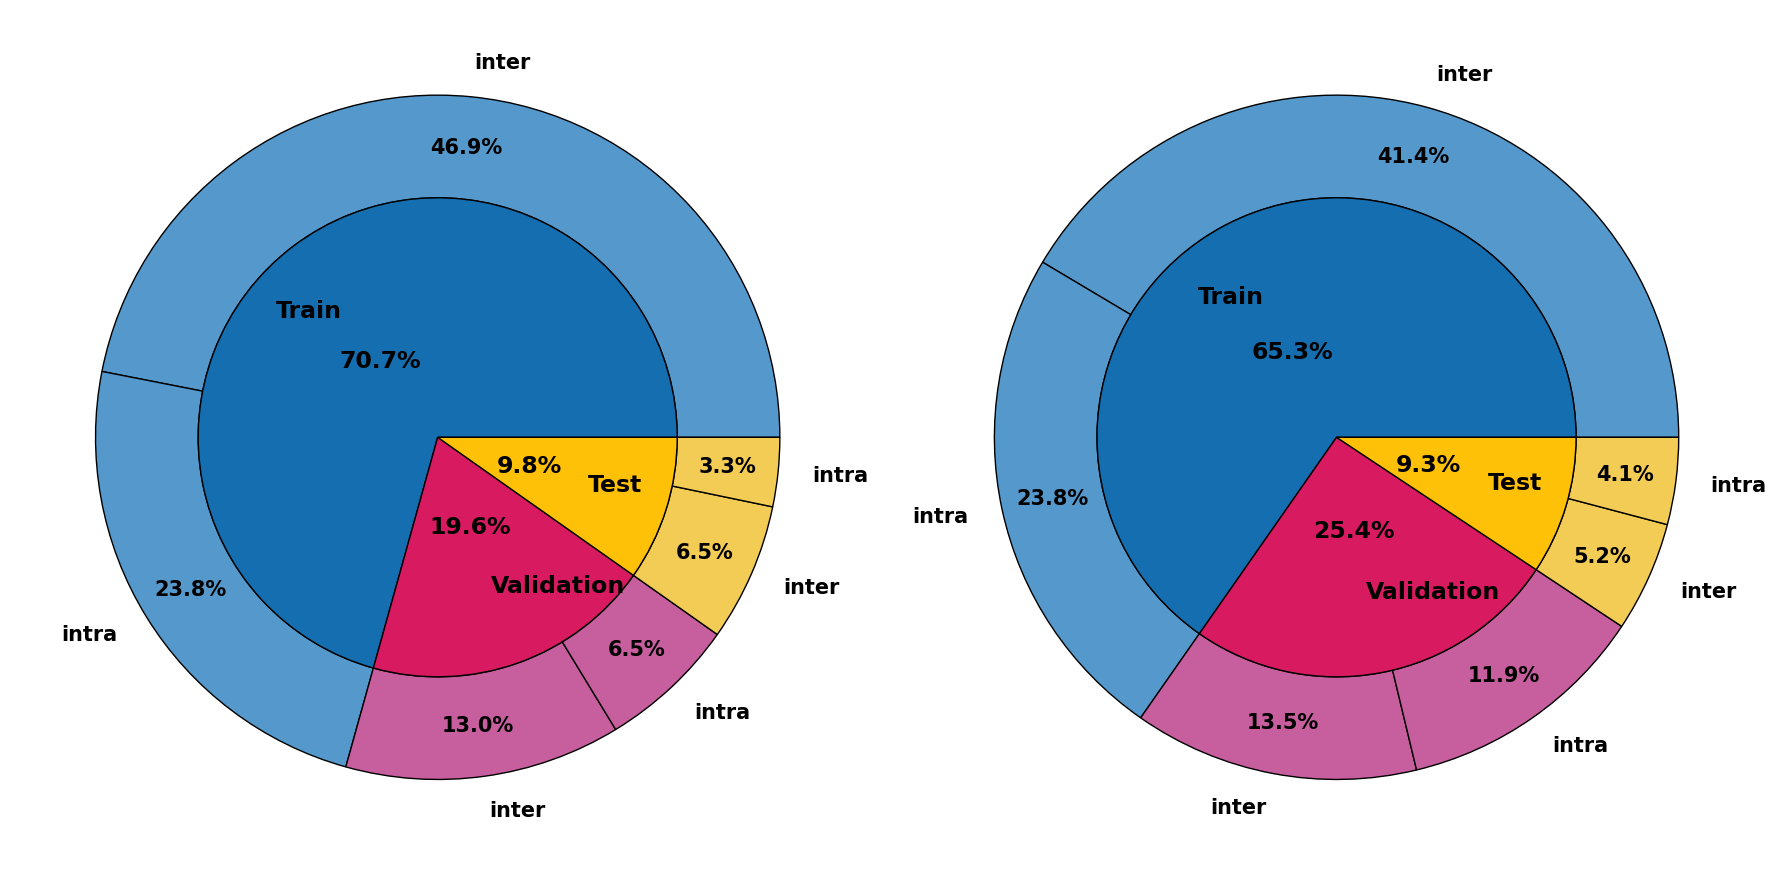

In [172]:
fig, axs = plt.subplots(1, 2, figsize=(18, 9))

for index, splits_counts in enumerate([splits_counts_no_overlap, splits_counts_overlap]):
    # Calculate the average total counts for train, val, and test
    total_counts = {'Train': 0, 'Validation': 0, 'Test': 0}
    for data in splits_counts:
        for key in data:
            total_counts[key] += data[key]['inter'] + data[key]['intra']
    for key in total_counts:
        total_counts[key] /= len(splits_counts)

    # Calculate the average inter and intra values per each set (train, val, test)
    avg_inter = {'Train': 0, 'Validation': 0, 'Test': 0}
    avg_intra = {'Train': 0, 'Validation': 0, 'Test': 0}

    for data in splits_counts:
        for category in avg_inter:
            avg_inter[category] += data[category]['inter']
            avg_intra[category] += data[category]['intra']

    for category in avg_inter:
        avg_inter[category] /= len(splits_counts)
        avg_intra[category] /= len(splits_counts)

    # Create lists of the calculated averages
    inter_values = [avg_inter[key] for key in avg_inter]
    intra_values = [avg_intra[key] for key in avg_intra]

    interleaved = [val for pair in zip(inter_values, intra_values) for val in pair]
    labels_outer = 3*['inter','intra']

    inner_colors = ['#156EAF', '#D81B60', '#FFC107']
    outer_colors_single = ['#5599CC', '#C75E9E', '#F3CC56']
    outer_colors = np.repeat(outer_colors_single, 2)
    size = 0.3
    r = 1

    # Generating pie charts
    ax = axs[index]
    ax.pie(interleaved, labels=labels_outer, radius=r,
           colors=outer_colors, wedgeprops=dict(width=size, edgecolor='k'), autopct='%1.1f%%', textprops=dict(color='k', fontsize=15, fontweight='bold'), pctdistance=0.85)
    ax.pie([total_counts['Train'], total_counts['Validation'], total_counts['Test']], labels=total_counts.keys(), radius=r - size, colors=inner_colors,
           labeldistance=0.659, textprops=dict(color='k', fontsize=17, fontweight='bold'), wedgeprops=dict(edgecolor='k'), autopct='%1.1f%%', pctdistance=0.4)

    # Set the title for each pie chart
    # title_text = 'Train/Validation/Test Split Separation with No Overlap' if splits_counts == splits_counts_no_overlap else 'Train/Validation/Test Split Separation with Overlap'
    # ax.set_title(title_text, fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()


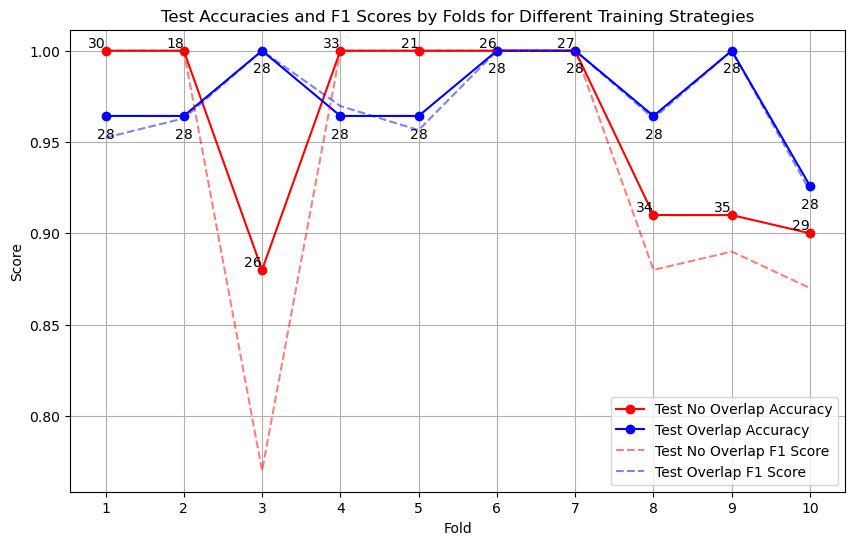

In [82]:
test_no_overlap_acc = [ 1.0, 1.0, 0.88, 1.0, 1.0, 1.0, 1.0, 0.91, 0.91, 0.90]
test_no_overlap_f1 = [ 1, 1, 0.77, 1, 1, 1, 1, 0.88, 0.89, 0.87]
test_qty_no_overlap = [ 30, 18, 26, 33, 21, 26, 27, 34, 35, 29]

test_overlap_acc = [0.9642857142857143, 0.9642857142857143, 1.0, 0.9642857142857143, 0.9642857142857143, 1.0, 1.0, 0.9642857142857143, 1.0, 0.9259259259259259]
test_overlap_f1 = [0.9523809523809523, 0.962962962962963, 1.0, 0.9696969696969697, 0.9565217391304348, 1.0, 1.0, 0.962962962962963, 1.0, 0.9230769230769231]
test_qty_overlap = 10*[28]

plt.figure(figsize=(10, 6))

plt.plot(test_no_overlap_acc, 'ro-', label='Test No Overlap Accuracy')
plt.plot(test_overlap_acc, 'bo-', label='Test Overlap Accuracy')

plt.plot(test_no_overlap_f1, 'r--', label='Test No Overlap F1 Score', alpha=0.5)
plt.plot(test_overlap_f1, 'b--', label='Test Overlap F1 Score', alpha=0.5)

for x, y in zip(range(10), test_no_overlap_acc):
    plt.text(x, y+0.002, str(test_qty_no_overlap[x]), ha='right')

for x, y in zip(range(10), test_overlap_acc):
    plt.text(x, y-0.006, str(test_qty_overlap[x]), ha='center', va='top')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Test Accuracies and F1 Scores by Folds for Different Training Strategies')
plt.xticks(range(10), [str(i+1) for i in range(10)])
plt.legend()
plt.grid(True)
plt.show()




In [163]:
[str(i+1) for i in range(10)]

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

[0.96, 0.975, 0.941, 0.973]
0.04959838707054897 0.02341269841269841 0.07841555968046138 0.02513326730429045


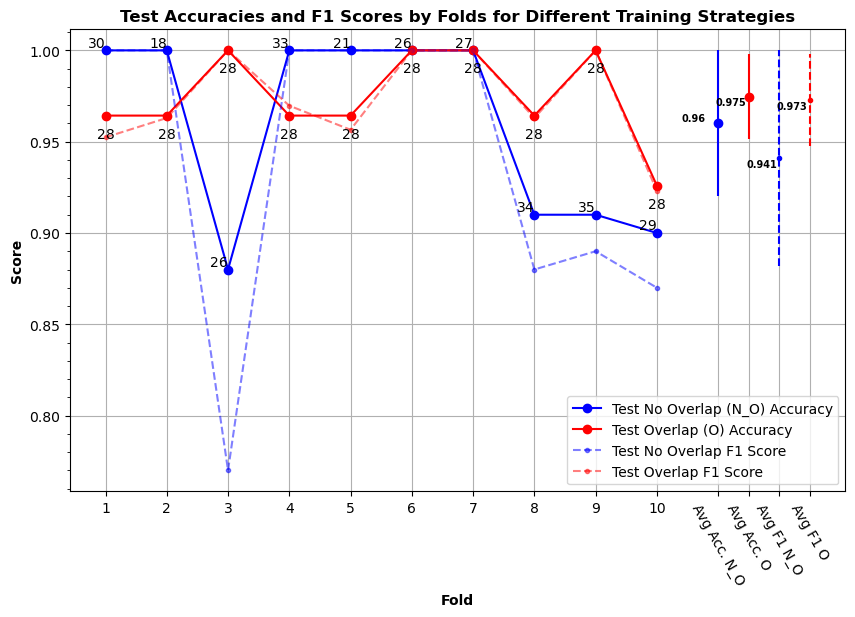

In [179]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
test_no_overlap_acc = [1.0, 1.0, 0.88, 1.0, 1.0, 1.0, 1.0, 0.91, 0.91, 0.90]
test_no_overlap_f1 = [1, 1, 0.77, 1, 1, 1, 1, 0.88, 0.89, 0.87]
test_qty_no_overlap = [30, 18, 26, 33, 21, 26, 27, 34, 35, 29]

test_overlap_acc = [0.9642857142857143, 0.9642857142857143, 1.0, 0.9642857142857143, 0.9642857142857143, 1.0, 1.0, 0.9642857142857143, 1.0, 0.9259259259259259]
test_overlap_f1 = [0.9523809523809523, 0.962962962962963, 1.0, 0.9696969696969697, 0.9565217391304348, 1.0, 1.0, 0.962962962962963, 1.0, 0.9230769230769231]
test_qty_overlap = 10 * [28]

# plt.figure(figsize=(10, 6))

plt.plot(test_no_overlap_acc, 'bo-', label='Test No Overlap (N_O) Accuracy')
plt.plot(test_overlap_acc, 'ro-', label='Test Overlap (O) Accuracy')

plt.plot(test_no_overlap_f1, 'b.--', label='Test No Overlap F1 Score', alpha=0.5)
plt.plot(test_overlap_f1, 'r.--', label='Test Overlap F1 Score', alpha=0.5)

# Test No Overlap
avg_no_overlap_acc = np.mean(test_no_overlap_acc)
std_no_overlap_acc = np.std(test_no_overlap_acc)
yerr_no_acc = std_no_overlap_acc if avg_no_overlap_acc + std_no_overlap_acc <= 1 else 1 - avg_no_overlap_acc
eb1 = plt.errorbar(10, avg_no_overlap_acc, yerr=yerr_no_acc, fmt='bo')


avg_no_overlap_f1 = np.mean(test_no_overlap_f1)
std_no_overlap_f1 = np.std(test_no_overlap_f1)
yerr_no_f1 = std_no_overlap_f1 if avg_no_overlap_f1 + std_no_overlap_f1 <= 1 else 1 - avg_no_overlap_f1
eb2 = plt.errorbar(11, avg_no_overlap_f1, yerr=yerr_no_f1, fmt='b.')
eb2[-1][0].set_linestyle('--')

# Test Overlap
avg_overlap_acc = np.mean(test_overlap_acc)
std_overlap_acc = np.std(test_overlap_acc)
plt.errorbar(10.5, avg_overlap_acc, yerr=std_overlap_acc, fmt='ro')

avg_overlap_f1 = np.mean(test_overlap_f1)
std_overlap_f1 = np.std(test_overlap_f1)
# Ensure the error bars don't exceed y=1
yerr_o_f1 = std_overlap_f1 if avg_overlap_f1 + std_overlap_f1 <= 1 else 1 - avg_overlap_f1
eb4 = plt.errorbar(11.5, avg_overlap_f1, yerr=yerr_o_f1, fmt='r.')
eb4[-1][0].set_linestyle('--')

for x, y in zip(range(10), test_no_overlap_acc):
    plt.text(x, y + 0.002, str(test_qty_no_overlap[x]), ha='right')

for x, y in zip(range(10), test_overlap_acc):
    plt.text(x, y - 0.006, str(test_qty_overlap[x]), ha='center', va='top')

# Determine the y-axis ticks
# y_ticks = plt.gca().get_yticks()
ro = 3
y_avg_values = [np.round(np.mean(test_no_overlap_acc),ro), np.round(np.mean(test_overlap_acc),ro), np.round(np.mean(test_no_overlap_f1),ro), np.round(np.mean(test_overlap_f1),ro)]
print(y_avg_values)
print(std_no_overlap_acc, std_overlap_acc, std_no_overlap_f1, std_overlap_f1)

plt.text(10- 0.4, y_avg_values[0], str(y_avg_values[0]), ha='center', va='bottom', fontsize=7, weight='bold')
plt.text(10.5- 0.29, y_avg_values[1] - 0.006, str(y_avg_values[1]), ha='center', va='bottom', fontsize=7, weight='bold')
plt.text(11- 0.29, y_avg_values[2] - 0.006, str(y_avg_values[2]), ha='center', va='bottom', fontsize=7, weight='bold')
plt.text(11.5- 0.29, y_avg_values[3] - 0.006, str(y_avg_values[3]), ha='center', va='bottom', fontsize=7, weight='bold')
# y_tick_labels = [f'{val:.2f}' for val in y_ticks] + [f'{val:.2f}' for val in y_avg_values]
# # Set specific y-axis ticks and labels
# plt.yticks(np.concatenate([y_ticks, y_avg_values]), y_tick_labels)

plt.xlabel('Fold', weight='bold')
plt.ylabel('Score', weight='bold')
plt.title('Test Accuracies and F1 Scores by Folds for Different Training Strategies', weight='bold')
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,10.5,11,11.5], [str(i+1) for i in range(10)] + ['Avg Acc. N_O', 'Avg Acc. O', 'Avg F1 N_O', 'Avg F1 O'])
# Rotate specific labels by -60 degrees
plt.setp(plt.gca().get_xticklabels()[-4:], rotation=-60, ha="center")
plt.legend(loc='lower right')
# Currently, there are no minor ticks,
#   so trying to make them visible would have no effect
ax.yaxis.get_ticklocs(minor=True) 
# Initialize minor ticks
ax.minorticks_on()

# Now minor ticks exist and are turned on for both axes

# Turn off x-axis minor ticks
ax.xaxis.set_tick_params(which='minor', bottom=False)
plt.grid(True)
plt.show()


[0.96, 0.975, 0.941, 0.973]
0.04959838707054897 0.02341269841269841 0.07841555968046138 0.02513326730429045


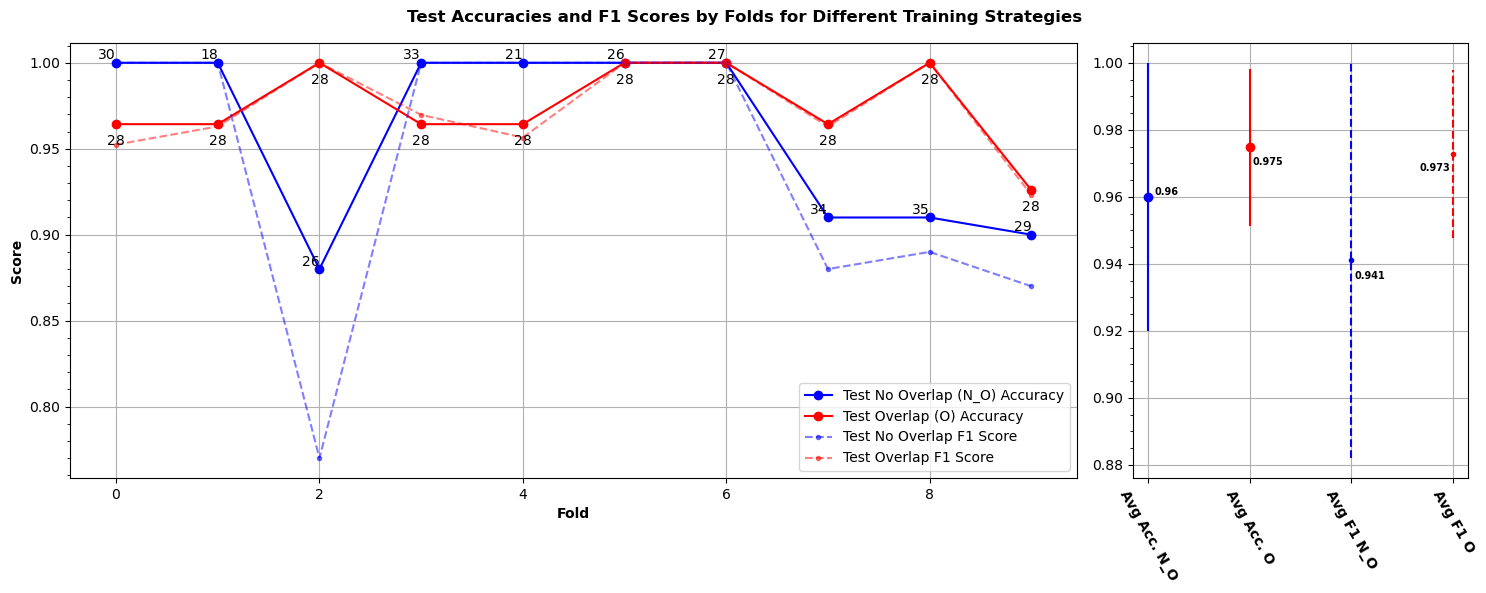

In [219]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [3, 1]})

test_no_overlap_acc = [1.0, 1.0, 0.88, 1.0, 1.0, 1.0, 1.0, 0.91, 0.91, 0.90]
test_no_overlap_f1 = [1, 1, 0.77, 1, 1, 1, 1, 0.88, 0.89, 0.87]
test_qty_no_overlap = [30, 18, 26, 33, 21, 26, 27, 34, 35, 29]

test_overlap_acc = [0.9642857142857143, 0.9642857142857143, 1.0, 0.9642857142857143, 0.9642857142857143, 1.0, 1.0, 0.9642857142857143, 1.0, 0.9259259259259259]
test_overlap_f1 = [0.9523809523809523, 0.962962962962963, 1.0, 0.9696969696969697, 0.9565217391304348, 1.0, 1.0, 0.962962962962963, 1.0, 0.9230769230769231]
test_qty_overlap = 10 * [28]

# plt.figure(figsize=(10, 6))

ax1.plot(test_no_overlap_acc, 'bo-', label='Test No Overlap (N_O) Accuracy')
ax1.plot(test_overlap_acc, 'ro-', label='Test Overlap (O) Accuracy')

ax1.plot(test_no_overlap_f1, 'b.--', label='Test No Overlap F1 Score', alpha=0.5)
ax1.plot(test_overlap_f1, 'r.--', label='Test Overlap F1 Score', alpha=0.5)

# Test No Overlap
avg_no_overlap_acc = np.mean(test_no_overlap_acc)
std_no_overlap_acc = np.std(test_no_overlap_acc)
yerr_no_acc = std_no_overlap_acc if avg_no_overlap_acc + std_no_overlap_acc <= 1 else 1 - avg_no_overlap_acc
eb1 = ax2.errorbar(1, avg_no_overlap_acc, yerr=yerr_no_acc, fmt='bo')


avg_no_overlap_f1 = np.mean(test_no_overlap_f1)
std_no_overlap_f1 = np.std(test_no_overlap_f1)
yerr_no_f1 = std_no_overlap_f1 if avg_no_overlap_f1 + std_no_overlap_f1 <= 1 else 1 - avg_no_overlap_f1
eb2 = ax2.errorbar(2, avg_no_overlap_f1, yerr=yerr_no_f1, fmt='b.')
eb2[-1][0].set_linestyle('--')

# Test Overlap
avg_overlap_acc = np.mean(test_overlap_acc)
std_overlap_acc = np.std(test_overlap_acc)
ax2.errorbar(1.5, avg_overlap_acc, yerr=std_overlap_acc, fmt='ro')

avg_overlap_f1 = np.mean(test_overlap_f1)
std_overlap_f1 = np.std(test_overlap_f1)
# Ensure the error bars don't exceed y=1
yerr_o_f1 = std_overlap_f1 if avg_overlap_f1 + std_overlap_f1 <= 1 else 1 - avg_overlap_f1
eb4 = ax2.errorbar(2.5, avg_overlap_f1, yerr=yerr_o_f1, fmt='r.')
eb4[-1][0].set_linestyle('--')

for x, y in zip(range(10), test_no_overlap_acc):
    ax1.text(x, y + 0.002, str(test_qty_no_overlap[x]), ha='right')

for x, y in zip(range(10), test_overlap_acc):
    ax1.text(x, y - 0.006, str(test_qty_overlap[x]), ha='center', va='top')

# Determine the y-axis ticks
# y_ticks = plt.gca().get_yticks()
ro = 3
y_avg_values = [np.round(np.mean(test_no_overlap_acc),ro), np.round(np.mean(test_overlap_acc),ro), np.round(np.mean(test_no_overlap_f1),ro), np.round(np.mean(test_overlap_f1),ro)]
print(y_avg_values)
print(std_no_overlap_acc, std_overlap_acc, std_no_overlap_f1, std_overlap_f1)

ax2.text(1+ 0.09, y_avg_values[0], str(y_avg_values[0]), ha='center', va='bottom', fontsize=7, weight='bold')
ax2.text(1.5+ 0.09, y_avg_values[1] - 0.006, str(y_avg_values[1]), ha='center', va='bottom', fontsize=7, weight='bold')
ax2.text(2+ 0.09, y_avg_values[2] - 0.006, str(y_avg_values[2]), ha='center', va='bottom', fontsize=7, weight='bold')
ax2.text(2.5- 0.09, y_avg_values[3] - 0.006, str(y_avg_values[3]), ha='center', va='bottom', fontsize=7, weight='bold')
# y_tick_labels = [f'{val:.2f}' for val in y_ticks] + [f'{val:.2f}' for val in y_avg_values]
# # Set specific y-axis ticks and labels
# plt.yticks(np.concatenate([y_ticks, y_avg_values]), y_tick_labels)

ax1.set_xlabel('Fold', weight='bold')
ax1.set_ylabel('Score', weight='bold')
plt.suptitle('Test Accuracies and F1 Scores by Folds for Different Training Strategies', weight='bold')
# plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,10.5,11,11.5], [str(i+1) for i in range(10)] + ['Avg Acc. N_O', 'Avg Acc. O', 'Avg F1 N_O', 'Avg F1 O'])
# Rotate specific labels by -60 degrees
# plt.setp(plt.gca().get_xticklabels()[-4:], rotation=-60, ha="center")
ax1.legend(loc='lower right')
ax2.set_xticks([1,1.5,2,2.5], ['Avg Acc. N_O', 'Avg Acc. O', 'Avg F1 N_O', 'Avg F1 O'], rotation=-60, weight='bold')
# Currently, there are no minor ticks,
#   so trying to make them visible would have no effect
ax1.yaxis.get_ticklocs(minor=True) 
# Initialize minor ticks
ax1.minorticks_on()
ax2.minorticks_on()

# Now minor ticks exist and are turned on for both axes

# Turn off x-axis minor ticks
ax1.xaxis.set_tick_params(which='minor', bottom=False)
ax2.xaxis.set_tick_params(which='minor', bottom=False)
ax2.grid(True)
ax1.grid(True)
fig.tight_layout()
plt.show()


1.0


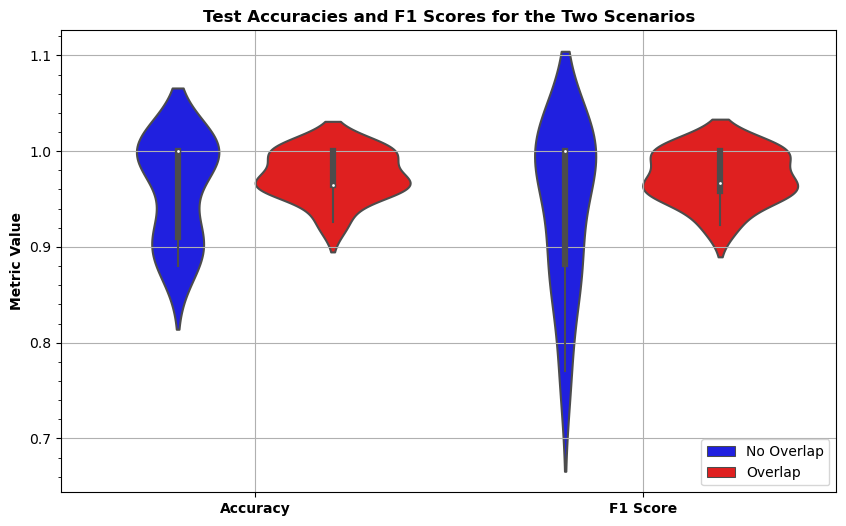

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Existing data
test_no_overlap_acc = [1.0, 1.0, 0.88, 1.0, 1.0, 1.0, 1.0, 0.91, 0.91, 0.90]
test_no_overlap_f1 = [1, 1, 0.77, 1, 1, 1, 1, 0.88, 0.89, 0.87]
test_overlap_acc = [0.9642857142857143, 0.9642857142857143, 1.0, 0.9642857142857143, 0.9642857142857143, 1.0, 1.0, 0.9642857142857143, 1.0, 0.9259259259259259]
test_overlap_f1 = [0.9523809523809523, 0.962962962962963, 1.0, 0.9696969696969697, 0.9565217391304348, 1.0, 1.0, 0.962962962962963, 1.0, 0.9230769230769231]

# Combine the data into a DataFrame
data = {
    'Test Type': ['Accuracy'] * 10 + ['F1 Score'] * 10 + ['Accuracy'] * 10 + ['F1 Score'] * 10,
    'Scores': test_no_overlap_acc + test_no_overlap_f1 + test_overlap_acc + test_overlap_f1,
    'Scenario': ['No Overlap']*20 + ['Overlap']*20
}

print(np.median(test_no_overlap_acc))
df = pd.DataFrame(data)
# print(df)

# Plot using Seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='Test Type', y='Scores', data=df, hue='Scenario', notch=True, showcaps=False, medianprops={"color": "k", "linewidth": 2}, palette={"No Overlap": "blue", "Overlap": "red"}).set(xlabel=None) #,
            # flierprops={"marker": "x"},
            # boxprops={"facecolor": (.3, .5, .7, .5)},
            # medianprops={"color": "r", "linewidth": 2},
            # palette={"No Overlap Accuracy": "blue", "No Overlap F1 Score": "blue",
            #          "Overlap Accuracy": "red", "Overlap F1 Score": "red"})

plt.ylabel('Metric Value', weight='bold')
plt.title('Test Accuracies and F1 Scores for the Two Scenarios', weight='bold')
plt.xticks(weight='bold')
#   so trying to make them visible would have no effect
ax.yaxis.get_ticklocs(minor=True) 
# Initialize minor ticks
ax.minorticks_on()

# Now minor ticks exist and are turned on for both axes

# Turn off x-axis minor ticks
ax.xaxis.set_tick_params(which='minor', bottom=False)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


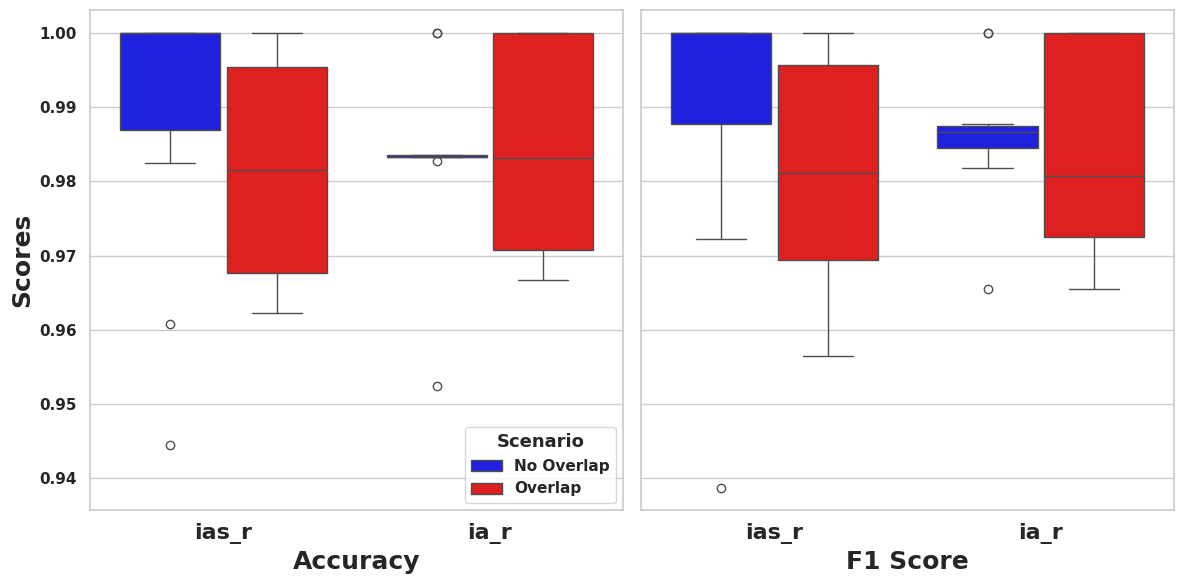

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
test_no_overlap_acc_ias_r = [0.9444444444444444, 1.0, 1.0, 0.9607843137254902, 1.0, 1.0, 1.0, 1.0, 0.9824561403508771, 1.0]
test_no_overlap_f1_ias_r = [0.9387755102040816, 1.0, 1.0, 0.9722222222222222, 1.0, 1.0, 1.0, 1.0, 0.9836065573770492, 1.0]
test_overlap_acc_ias_r = [0.9814814814814815, 1.0, 1.0, 0.9629629629629629, 0.9814814814814815, 1.0, 0.9814814814814815, 0.9814814814814815, 0.9622641509433962, 0.9622641509433962]
test_overlap_f1_ias_r = [0.9824561403508771, 1.0, 1.0, 0.9565217391304348, 0.9811320754716981, 1.0, 0.9777777777777777, 0.9811320754716981, 0.9565217391304348, 0.9666666666666667]
test_no_overlap_acc_ia_r = [0.9827586206896551, 1.0, 0.9833333333333333, 0.9833333333333333, 0.9523809523809523, 0.9836065573770492, 0.9833333333333333, 0.9836065573770492, 0.9833333333333333, 1.0]
test_no_overlap_f1_ia_r = [0.9870129870129869, 1.0, 0.9855072463768115, 0.9841269841269841, 0.9655172413793104, 0.9866666666666666, 0.9866666666666666, 0.9818181818181818, 0.9876543209876543, 1.0]
test_overlap_acc_ia_r = [1.0, 1.0, 0.9666666666666667, 0.9833333333333333, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9830508474576272, 0.9830508474576272]
test_overlap_f1_ia_r = [1.0, 1.0, 0.9666666666666666, 0.975609756097561, 1.0, 0.9655172413793104, 1.0, 0.9714285714285714, 0.975609756097561, 0.9859154929577464]

# Combine the data into a single DataFrame
data_acc = {
    'Value': test_no_overlap_acc_ias_r + test_overlap_acc_ias_r + test_no_overlap_acc_ia_r + test_overlap_acc_ia_r,
    'Scenario': ['No Overlap']*10 + ['Overlap']*10 + ['No Overlap']*10 + ['Overlap']*10,
    'Experiment': ['ias_r']*20 + ['ia_r']*20
}

data_f1 = {
    'Value': test_no_overlap_f1_ias_r + test_overlap_f1_ias_r + test_no_overlap_f1_ia_r + test_overlap_f1_ia_r,
    'Scenario': ['No Overlap']*10 + ['Overlap']*10 + ['No Overlap']*10 + ['Overlap']*10,
    'Experiment': ['ias_r']*20 + ['ia_r']*20
}

df_acc = pd.DataFrame(data_acc)
df_f1 = pd.DataFrame(data_f1)

from matplotlib import rcParams

rcParams['font.weight'] = 'bold'

# Define custom colors for the scenarios
palette = {"No Overlap": "blue", "Overlap": "red"}
# plt.legend(title='Scenario', title_fontsize='13', prop={'weight':'bold'}, loc='upper right')

# Create subplots
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6)) #figsize=(16, 8)

# Create the boxplot for Accuracy
plt.xticks(fontweight='bold',fontsize=14)
sns.boxplot(x='Experiment', y='Value', hue='Scenario', data=df_acc, palette=palette, dodge=True, ax=axes[0], width=.8, gap=.06)
axes[0].set_xlabel('Accuracy', fontdict={'weight': 'bold', 'size': 18})
axes[0].set_ylabel('Scores', fontdict={'weight': 'bold', 'size': 18})
axes[0].legend(title='Scenario', title_fontsize='13', prop={'weight':'bold'})
axes[0].tick_params(axis='x', labelsize=16)

# Create the boxplot for F1 Score
sns.boxplot(x='Experiment', y='Value', hue='Scenario', data=df_f1, palette=palette, dodge=True, ax=axes[1], width=.8, gap=.06)
axes[1].set_xlabel('F1 Score', fontdict={'weight': 'bold', 'size': 18})
axes[1].get_legend().set_visible(False)  # Hide the legend in the second plot
axes[1].tick_params(axis='x', labelsize=16)


# Adjust the legend and layout
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


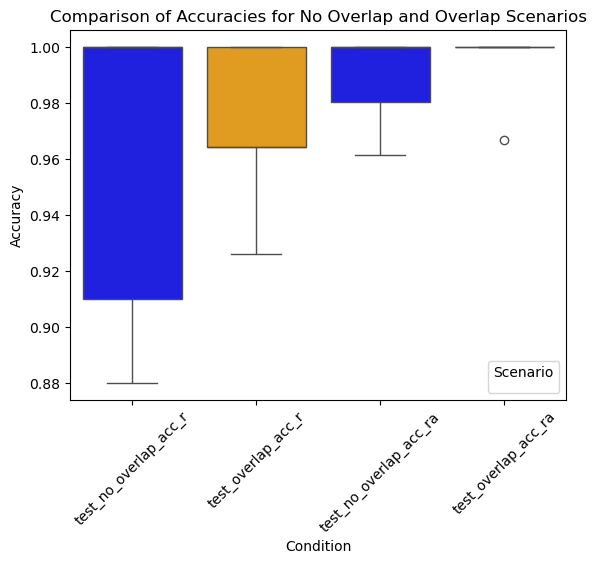

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Existing data
test_no_overlap_acc_r = [1.0, 1.0, 0.88, 1.0, 1.0, 1.0, 1.0, 0.91, 0.91, 0.90]
test_no_overlap_f1_r = [1, 1, 0.77, 1, 1, 1, 1, 0.88, 0.89, 0.87]
test_overlap_acc_r = [0.9642857142857143, 0.9642857142857143, 1.0, 0.9642857142857143, 0.9642857142857143, 1.0, 1.0, 0.9642857142857143, 1.0, 0.9259259259259259]
test_overlap_f1_r = [0.9523809523809523, 0.962962962962963, 1.0, 0.9696969696969697, 0.9565217391304348, 1.0, 1.0, 0.962962962962963, 1.0, 0.9230769230769231]

test_no_overlap_acc_ra = [1.0, 1.0, 0.9736842105263158, 0.9615384615384616, 1.0, 1.0, 1.0, 0.9642857142857143, 1.0, 1.0]
test_no_overlap_f1_ra = [1.0, 1.0, 0.9600000000000001, 0.888888888888889, 1.0, 1.0, 1.0, 0.967741935483871, 1.0, 1.0]
test_overlap_f1_ra = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9696969696969697, 1.0, 1.0]
test_overlap_acc_ra = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0]

# Combine the data into a single list
accuracies = test_no_overlap_acc_r + test_overlap_acc_r + test_no_overlap_acc_ra + test_overlap_acc_ra

# Create a corresponding list to specify the conditions
conditions = ['test_no_overlap_acc_r'] * len(test_no_overlap_acc_r) + ['test_overlap_acc_r'] * len(test_overlap_acc_r) + ['test_no_overlap_acc_ra'] * len(test_no_overlap_acc_ra) + ['test_overlap_acc_ra'] * len(test_overlap_acc_ra)

# Create a DataFrame from the data
data = {'Accuracy': accuracies, 'Condition': conditions}
df = pd.DataFrame(data)

# Plot
sns.boxplot(data=df, x='Condition', y='Accuracy', hue='Condition', palette={'test_no_overlap_acc_r': 'blue', 'test_overlap_acc_r': 'orange', 'test_no_overlap_acc_ra': 'blue', 'test_overlap_acc_ra': 'orange'})
plt.xticks(rotation=45)
plt.title('Comparison of Accuracies for No Overlap and Overlap Scenarios')
plt.xlabel('Condition')
plt.ylabel('Accuracy')
plt.legend(title='Scenario')
plt.show()



In [4]:
# Create DataFrames for each accuracy list
df_no_overlap_r = pd.DataFrame({'Accuracy': test_no_overlap_acc_r, 'Training Type': 'no overlap', 'Initialization': 'r'})
df_overlap_r = pd.DataFrame({'Accuracy': test_overlap_acc_r, 'Training Type': 'overlap', 'Initialization': 'r'})
df_no_overlap_ra = pd.DataFrame({'Accuracy': test_no_overlap_acc_ra, 'Training Type': 'no overlap', 'Initialization': 'ra'})
df_overlap_ra = pd.DataFrame({'Accuracy': test_overlap_acc_ra, 'Training Type': 'overlap', 'Initialization': 'ra'})

# Concatenate the DataFrames
df_combined = pd.concat([df_no_overlap_r, df_overlap_r, df_no_overlap_ra, df_overlap_ra], ignore_index=True)

# # Print the combined DataFrame
# print(df_combined)

# Create DataFrames for each F1 score list
df_no_overlap_f1_r = pd.DataFrame({'F1 Score': test_no_overlap_f1_r, 'Training Type': 'no overlap', 'Initialization': 'r'})
df_overlap_f1_r = pd.DataFrame({'F1 Score': test_overlap_f1_r, 'Training Type': 'overlap', 'Initialization': 'r'})
df_no_overlap_f1_ra = pd.DataFrame({'F1 Score': test_no_overlap_f1_ra, 'Training Type': 'no overlap', 'Initialization': 'ra'})
df_overlap_f1_ra = pd.DataFrame({'F1 Score': test_overlap_f1_ra, 'Training Type': 'overlap', 'Initialization': 'ra'})

# Concatenate the DataFrames
df_combined_f1 = pd.concat([df_no_overlap_f1_r, df_overlap_f1_r, df_no_overlap_f1_ra, df_overlap_f1_ra], ignore_index=True)

# # Print the combined DataFrame for F1 scores
# print(df_combined_f1)

# Combine the DataFrames along the columns axis
df_combined_full = pd.concat([df_combined, df_combined_f1['F1 Score']], axis=1)

# Print the combined DataFrame
print(df_combined_full)

    Accuracy Training Type Initialization  F1 Score
0   1.000000    no overlap              r  1.000000
1   1.000000    no overlap              r  1.000000
2   0.880000    no overlap              r  0.770000
3   1.000000    no overlap              r  1.000000
4   1.000000    no overlap              r  1.000000
5   1.000000    no overlap              r  1.000000
6   1.000000    no overlap              r  1.000000
7   0.910000    no overlap              r  0.880000
8   0.910000    no overlap              r  0.890000
9   0.900000    no overlap              r  0.870000
10  0.964286       overlap              r  0.952381
11  0.964286       overlap              r  0.962963
12  1.000000       overlap              r  1.000000
13  0.964286       overlap              r  0.969697
14  0.964286       overlap              r  0.956522
15  1.000000       overlap              r  1.000000
16  1.000000       overlap              r  1.000000
17  0.964286       overlap              r  0.962963
18  1.000000

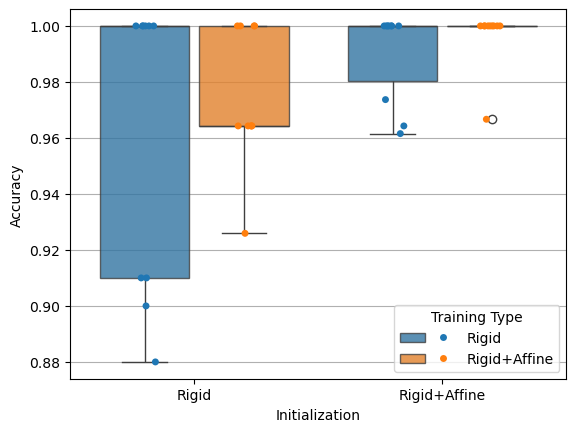

In [20]:
ax = sns.boxplot(data=df_combined_full, x="Initialization", y="Accuracy", hue="Training Type", gap=.1, boxprops={'alpha': 0.8})
sns.stripplot(data=df_combined_full, x="Initialization", y="Accuracy",
              hue="Training Type", dodge=True, ax=ax)
# Renaming the x-axis labels
plt.xticks(ticks=[0, 1], labels=["Rigid", "Rigid+Affine"])
# Add horizontal grid lines
plt.grid(axis='y')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[(handles[0], handles[2]), (handles[1], handles[3])],
          labels=["Rigid", "Rigid+Affine"],
          loc='lower right', handlelength=4,
          handler_map={tuple: HandlerTuple(ndivide=None)}, title = 'Training Type')

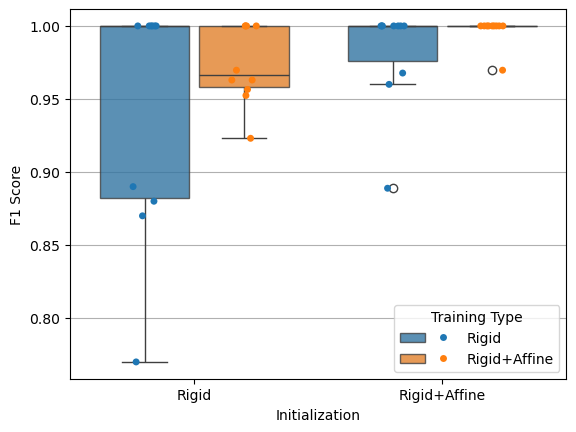

In [18]:
from matplotlib.legend_handler import HandlerTuple
ax = sns.boxplot(data=df_combined_full, x="Initialization", y="F1 Score", hue="Training Type", gap=.1, boxprops={'alpha': 0.8})
sns.stripplot(data=df_combined_full, x="Initialization", y="F1 Score",
              hue="Training Type", dodge=True, ax=ax)
handles, labels = ax.get_legend_handles_labels()
# Renaming the x-axis labels
plt.xticks(ticks=[0, 1], labels=["Rigid", "Rigid+Affine"])
# Add horizontal grid lines
plt.grid(axis='y')
ax.legend(handles=[(handles[0], handles[2]), (handles[1], handles[3])],
          labels=["Rigid", "Rigid+Affine"],
          loc='lower right', handlelength=4,
          handler_map={tuple: HandlerTuple(ndivide=None)}, title = 'Training Type')